In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.rc('font', family='AppleGothic') #한글 깨짐 방지 설정
#plt.rcParams['axes.unicode_minus'] = False # 마이너스부호 깨짐 방지 설정

In [41]:
train_df = pd.read_csv('./open/train.csv')
train_df.head()

ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0  TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1  TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2  TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3  TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4  TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   

   부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
0        18.90    15  부채 통합             0       0       0.0    0.0    0.0    C  
1        22.33    21  주택 개선             0  373572  234060.0    0.0    0.0    B  
2         8.60    14  부채 통합             0  928644  151944.0    0.0    0.0    A  
3        15.09    15  부채 통합             0  325824  153108.0    0.0    0.0    C  
4        25.39    19  주요 구매             0  228540  148956.0    0.0    0.0    B

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [43]:
train_df.describe(include='all')

ID          대출금액        대출기간       근로기간    주택소유상태  \
count         96294  9.629400e+04       96294      96294     96294   
unique        96294           NaN           2         16         4   
top     TRAIN_00000           NaN   36 months  10+ years  MORTGAGE   
freq              1           NaN       64479      31585     47934   
mean            NaN  1.830400e+07         NaN        NaN       NaN   
std             NaN  1.032908e+07         NaN        NaN       NaN   
min             NaN  1.200000e+06         NaN        NaN       NaN   
25%             NaN  1.020000e+07         NaN        NaN       NaN   
50%             NaN  1.680000e+07         NaN        NaN       NaN   
75%             NaN  2.400000e+07         NaN        NaN       NaN   
max             NaN  4.200000e+07         NaN        NaN       NaN   

                연간소득   부채_대비_소득_비율          총계좌수   대출목적  최근_2년간_연체_횟수  \
count   9.629400e+04  96294.000000  96294.000000  96294  96294.000000   
unique           NaN           NaN           NaN     12           NaN   
top              NaN           NaN           NaN  부채 통합           NaN   
freq             NaN           NaN           NaN  55150           NaN   
mean    9.392672e+07     19.379590     25.304827    NaN      0.345681   
std     9.956871e+07     33.569559     12.088566    NaN      0.919119   
min     0.000000e+00      0.000000      4.000000    NaN      0.000000   
25%     5.760000e+07     12.650000     17.000000    NaN      0.000000   
50%     7.800000e+07     18.740000     24.000000    NaN      0.000000   
75%     1.128000e+08     25.540000     32.000000    NaN      0.000000   
max     1.080000e+10   9999.000000    169.000000    NaN     30.000000   

               총상환원금         총상환이자         총연체금액         연체계좌수   대출등급  
count   9.629400e+04  9.629400e+04  96294.000000  96294.000000  96294  
unique           NaN           NaN           NaN           NaN      7  
top              NaN           NaN           NaN           NaN      B  
freq             NaN           NaN           NaN           NaN  28817  
mean    8.225035e+05  4.282282e+05     54.380584      0.005805    NaN  
std     1.027745e+06  4.402111e+05   1414.769218      0.079966    NaN  
min     0.000000e+00  0.000000e+00      0.000000      0.000000    NaN  
25%     3.075720e+05  1.346160e+05      0.000000      0.000000    NaN  
50%     5.976960e+05  2.870040e+05      0.000000      0.000000    NaN  
75%     1.055076e+06  5.702160e+05      0.000000      0.000000    NaN  
max     4.195594e+07  5.653416e+06  75768.000000      4.000000    NaN

In [44]:
# train set에 있는 주택소유상태 = 'ANY'인 것 삭제, test set에는 없는 항목이고 train set에도 1개 밖에 되지 않아 삭제하는 것이 좋다고 판단.

train_df = train_df[train_df['주택소유상태']!= 'ANY']

In [45]:
# 근로기간 컬럼 중복된 항목 합치기
# 함수 선언

def unit_standardization(x):
    if (x == '10+ years') or (x == '10+years'):
        return '10년이상'
    elif x == '9 years':
        return '9'
    elif x == '8 years':
        return '8'
    elif x == '7 years':
        return '7'
    elif x == '6 years':
        return '6'
    elif x == '5 years':
        return '5'
    elif x == '4 years':
        return '4'
    elif (x == '3 years') or (x == '3'):
        return '3'
    elif x == '2 years':
        return '2'
    elif (x == '1 year') or (x == '1 years'):
        return '1'
    elif (x == '< 1 year') or (x == '<1 year') :
        return '1년이하'
    else:
        return 'Unknown'

In [46]:
# train set에 적용

train_df['근로기간'] = train_df['근로기간'].apply(unit_standardization)

In [47]:
# 대출기간 범주형 --> 수치형으로 변경
# 함수 선언

def conv_loan_period(x):
    if x == ' 36 months':
        return 36
    else:
        return 60

In [48]:
# train set에 적용

train_df['대출기간'] = train_df['대출기간'].apply(conv_loan_period)

In [49]:
display(train_df.head(3))

ID      대출금액  대출기간   근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
0  TRAIN_00000  12480000    36      6      RENT   72000000        18.90    15   
1  TRAIN_00001  14400000    60  10년이상  MORTGAGE  130800000        22.33    21   
2  TRAIN_00002  12000000    36      5  MORTGAGE   96000000         8.60    14   

    대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
0  부채 통합             0       0       0.0    0.0    0.0    C  
1  주택 개선             0  373572  234060.0    0.0    0.0    B  
2  부채 통합             0  928644  151944.0    0.0    0.0    A

In [50]:
# 파생변수 생성하기

train_df['총상환액'] = train_df['총상환원금'] + train_df['총상환이자']

In [51]:
train_df['총상환대출비율'] = train_df['총상환액'] / train_df['대출금액']
train_df['월별대출금액'] = train_df['대출금액'] / train_df['대출기간']

In [52]:
train_df.head(3)

ID      대출금액  대출기간   근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
0  TRAIN_00000  12480000    36      6      RENT   72000000        18.90    15   
1  TRAIN_00001  14400000    60  10년이상  MORTGAGE  130800000        22.33    21   
2  TRAIN_00002  12000000    36      5  MORTGAGE   96000000         8.60    14   

    대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급       총상환액  \
0  부채 통합             0       0       0.0    0.0    0.0    C        0.0   
1  주택 개선             0  373572  234060.0    0.0    0.0    B   607632.0   
2  부채 통합             0  928644  151944.0    0.0    0.0    A  1080588.0   

    총상환대출비율         월별대출금액  
0  0.000000  346666.666667  
1  0.042197  240000.000000  
2  0.090049  333333.333333

In [53]:
# 수치형 컬럼 분포 시각화 함수

def get_3_hist(data:pd.DataFrame, columns:list):

    plt.figure(figsize=(15, 5 * (len(columns) // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(len(columns) // 3 + (len(columns) % 3 > 0), 3, i + 1)
        # 히스토그램 그리기
        sns.histplot(data[col])
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()

In [54]:
train_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급',
       '총상환액', '총상환대출비율', '월별대출금액'],
      dtype='object')

In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96293 entries, 0 to 96293
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96293 non-null  object 
 1   대출금액          96293 non-null  int64  
 2   대출기간          96293 non-null  int64  
 3   근로기간          96293 non-null  object 
 4   주택소유상태        96293 non-null  object 
 5   연간소득          96293 non-null  int64  
 6   부채_대비_소득_비율   96293 non-null  float64
 7   총계좌수          96293 non-null  int64  
 8   대출목적          96293 non-null  object 
 9   최근_2년간_연체_횟수  96293 non-null  int64  
 10  총상환원금         96293 non-null  int64  
 11  총상환이자         96293 non-null  float64
 12  총연체금액         96293 non-null  float64
 13  연체계좌수         96293 non-null  float64
 14  대출등급          96293 non-null  object 
 15  총상환액          96293 non-null  float64
 16  총상환대출비율       96293 non-null  float64
 17  월별대출금액        96293 non-null  float64
dtypes: float64(7), int64(6), o

In [56]:
numeric_list = ['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수',
       '총상환액', '총상환대출비율', '월별대출금액']

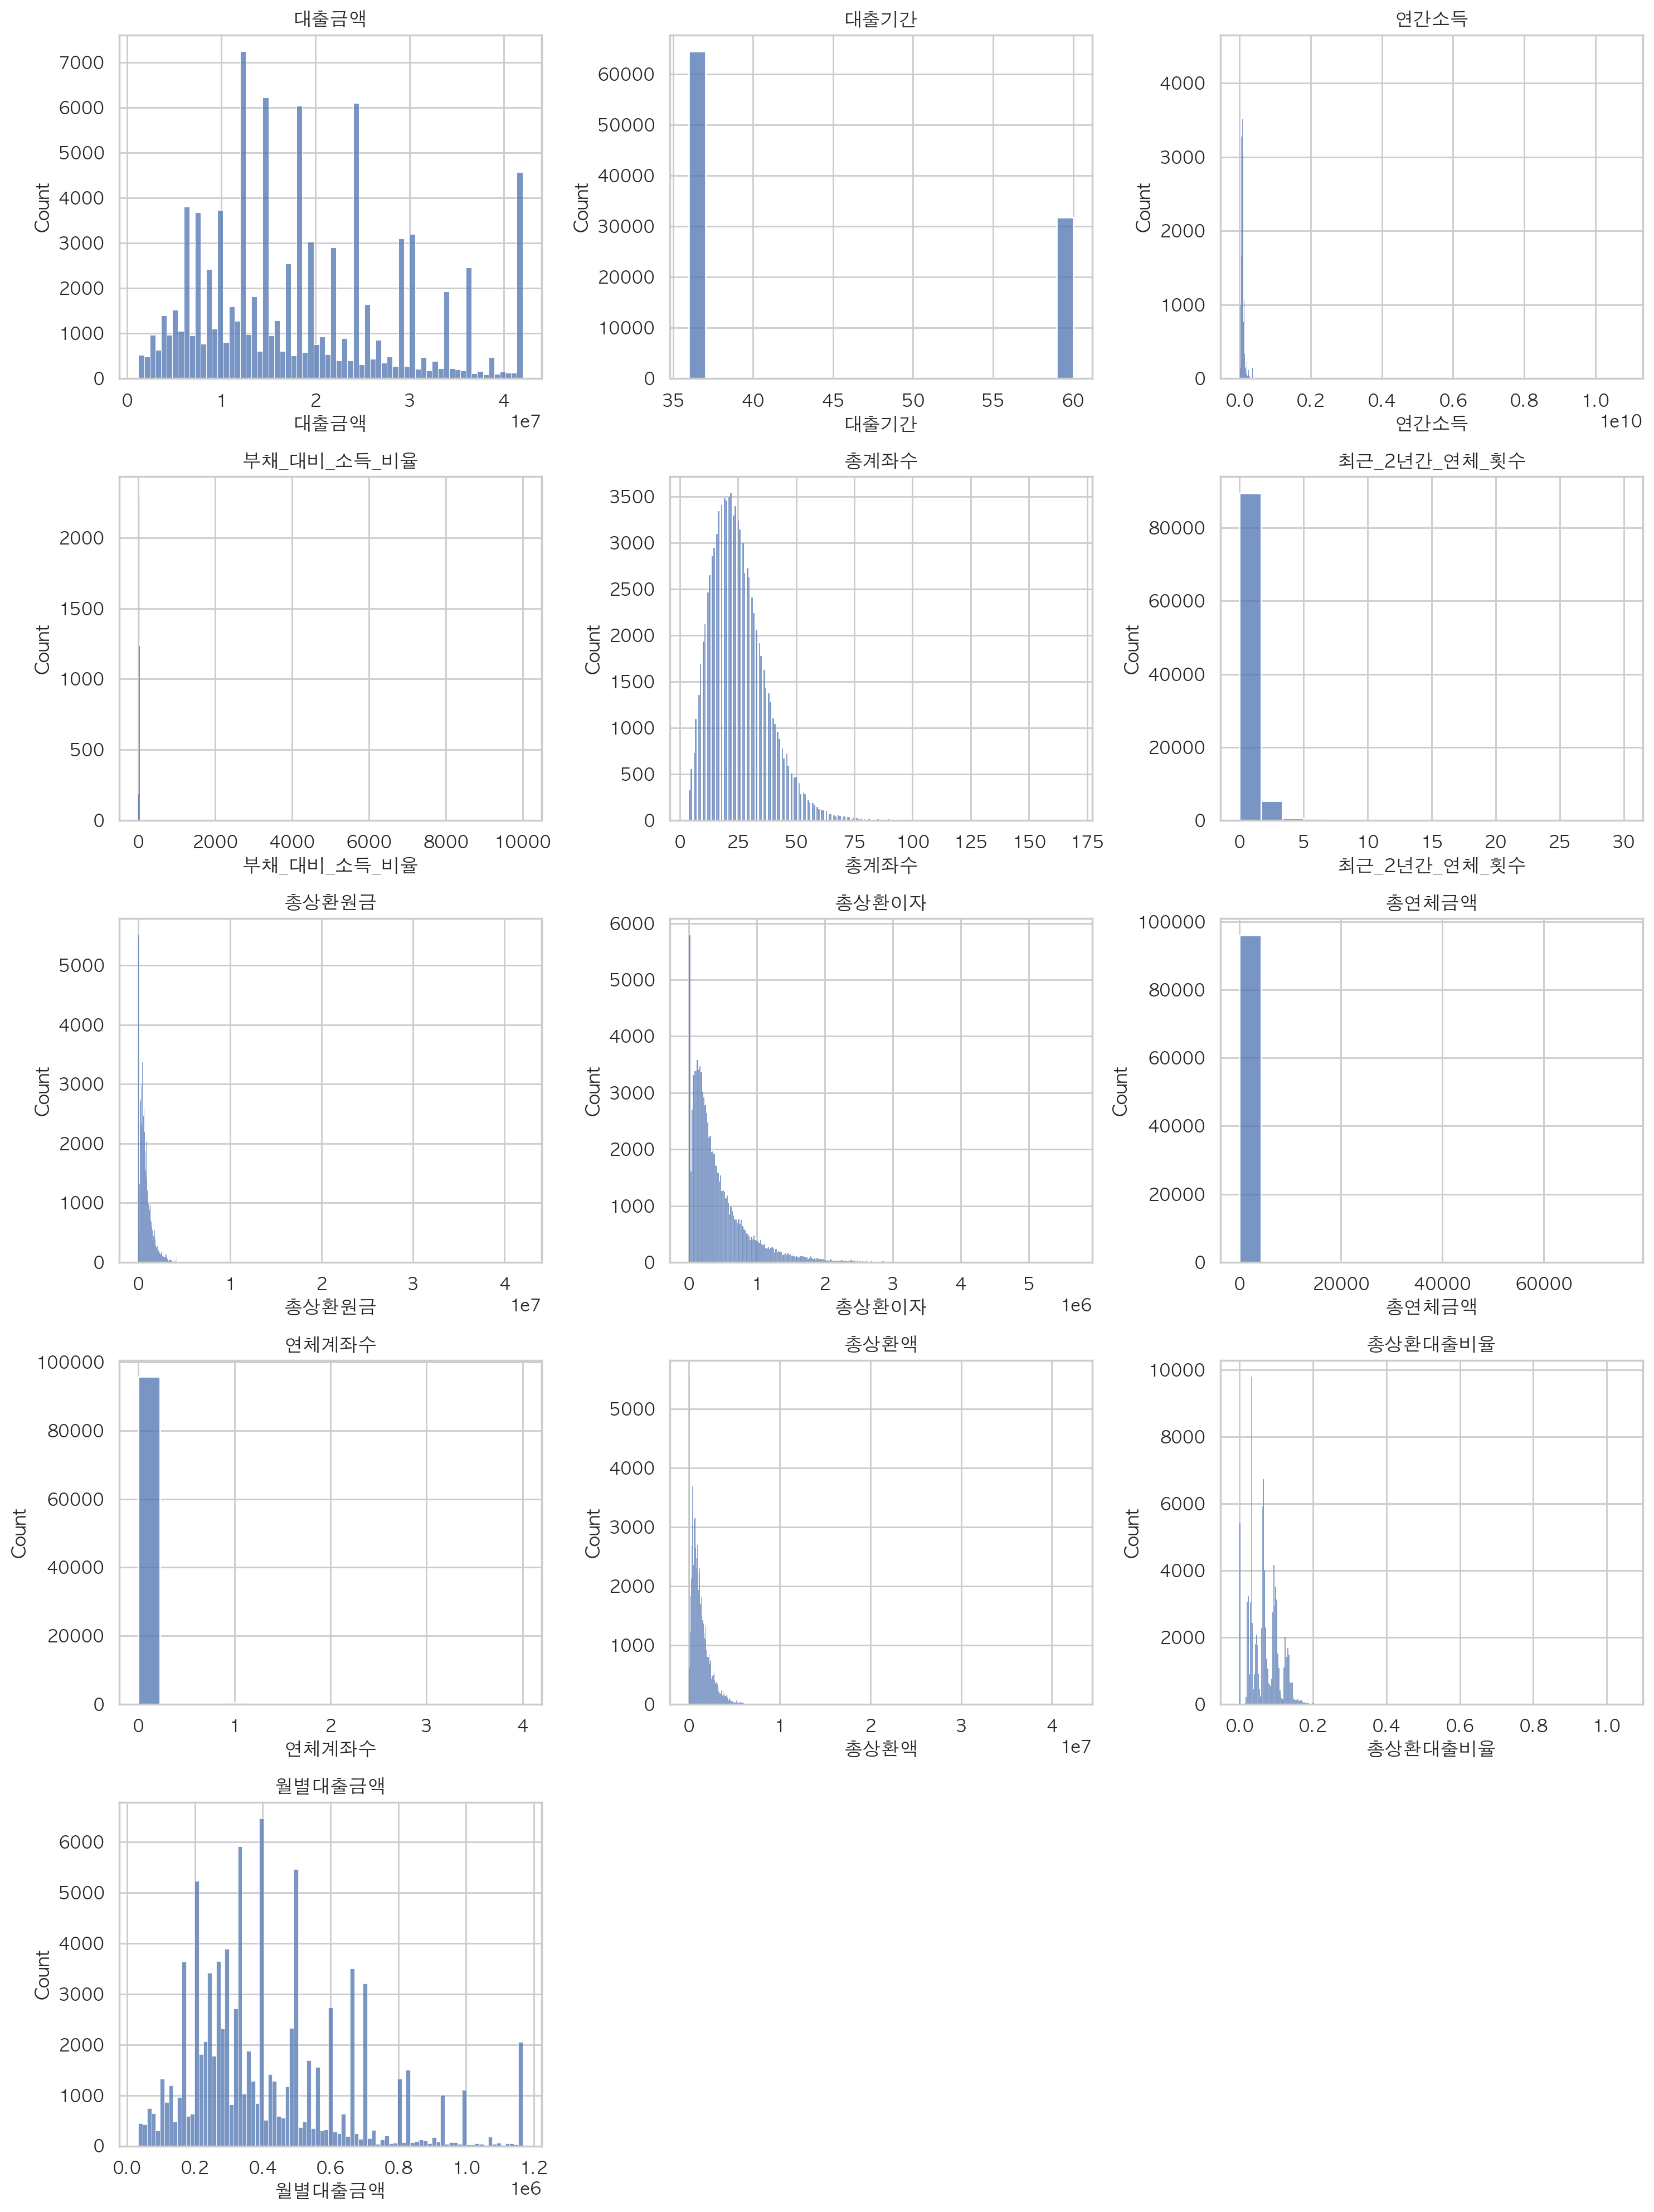

In [57]:
get_3_hist(train_df, numeric_list)

In [58]:
#수치형 데이터 로그 스케일링 적용

numeric_columns = train_df.select_dtypes(include=[np.number]).columns

train_df[numeric_columns] = np.log1p(train_df[numeric_columns])

In [59]:
numeric_columns

Index(['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금',
       '총상환이자', '총연체금액', '연체계좌수', '총상환액', '총상환대출비율', '월별대출금액'],
      dtype='object')

In [61]:
train_df.head(3)

ID       대출금액      대출기간   근로기간    주택소유상태       연간소득  부채_대비_소득_비율  \
0  TRAIN_00000  16.339638  3.610918      6      RENT  18.092177     2.990720   
1  TRAIN_00001  16.482739  4.110874  10년이상  MORTGAGE  18.689180     3.149740   
2  TRAIN_00002  16.300417  3.610918      5  MORTGAGE  18.379859     2.261763   

       총계좌수   대출목적  최근_2년간_연체_횟수      총상환원금      총상환이자  총연체금액  연체계좌수 대출등급  \
0  2.772589  부채 통합           0.0   0.000000   0.000000    0.0    0.0    C   
1  3.091042  주택 개선           0.0  12.830869  12.363337    0.0    0.0    B   
2  2.708050  부채 통합           0.0  13.741482  11.931274    0.0    0.0    A   

        총상환액   총상환대출비율     월별대출금액  
0   0.000000  0.000000  12.756122  
1  13.317326  0.041331  12.388398  
2  13.893017  0.086223  12.716901

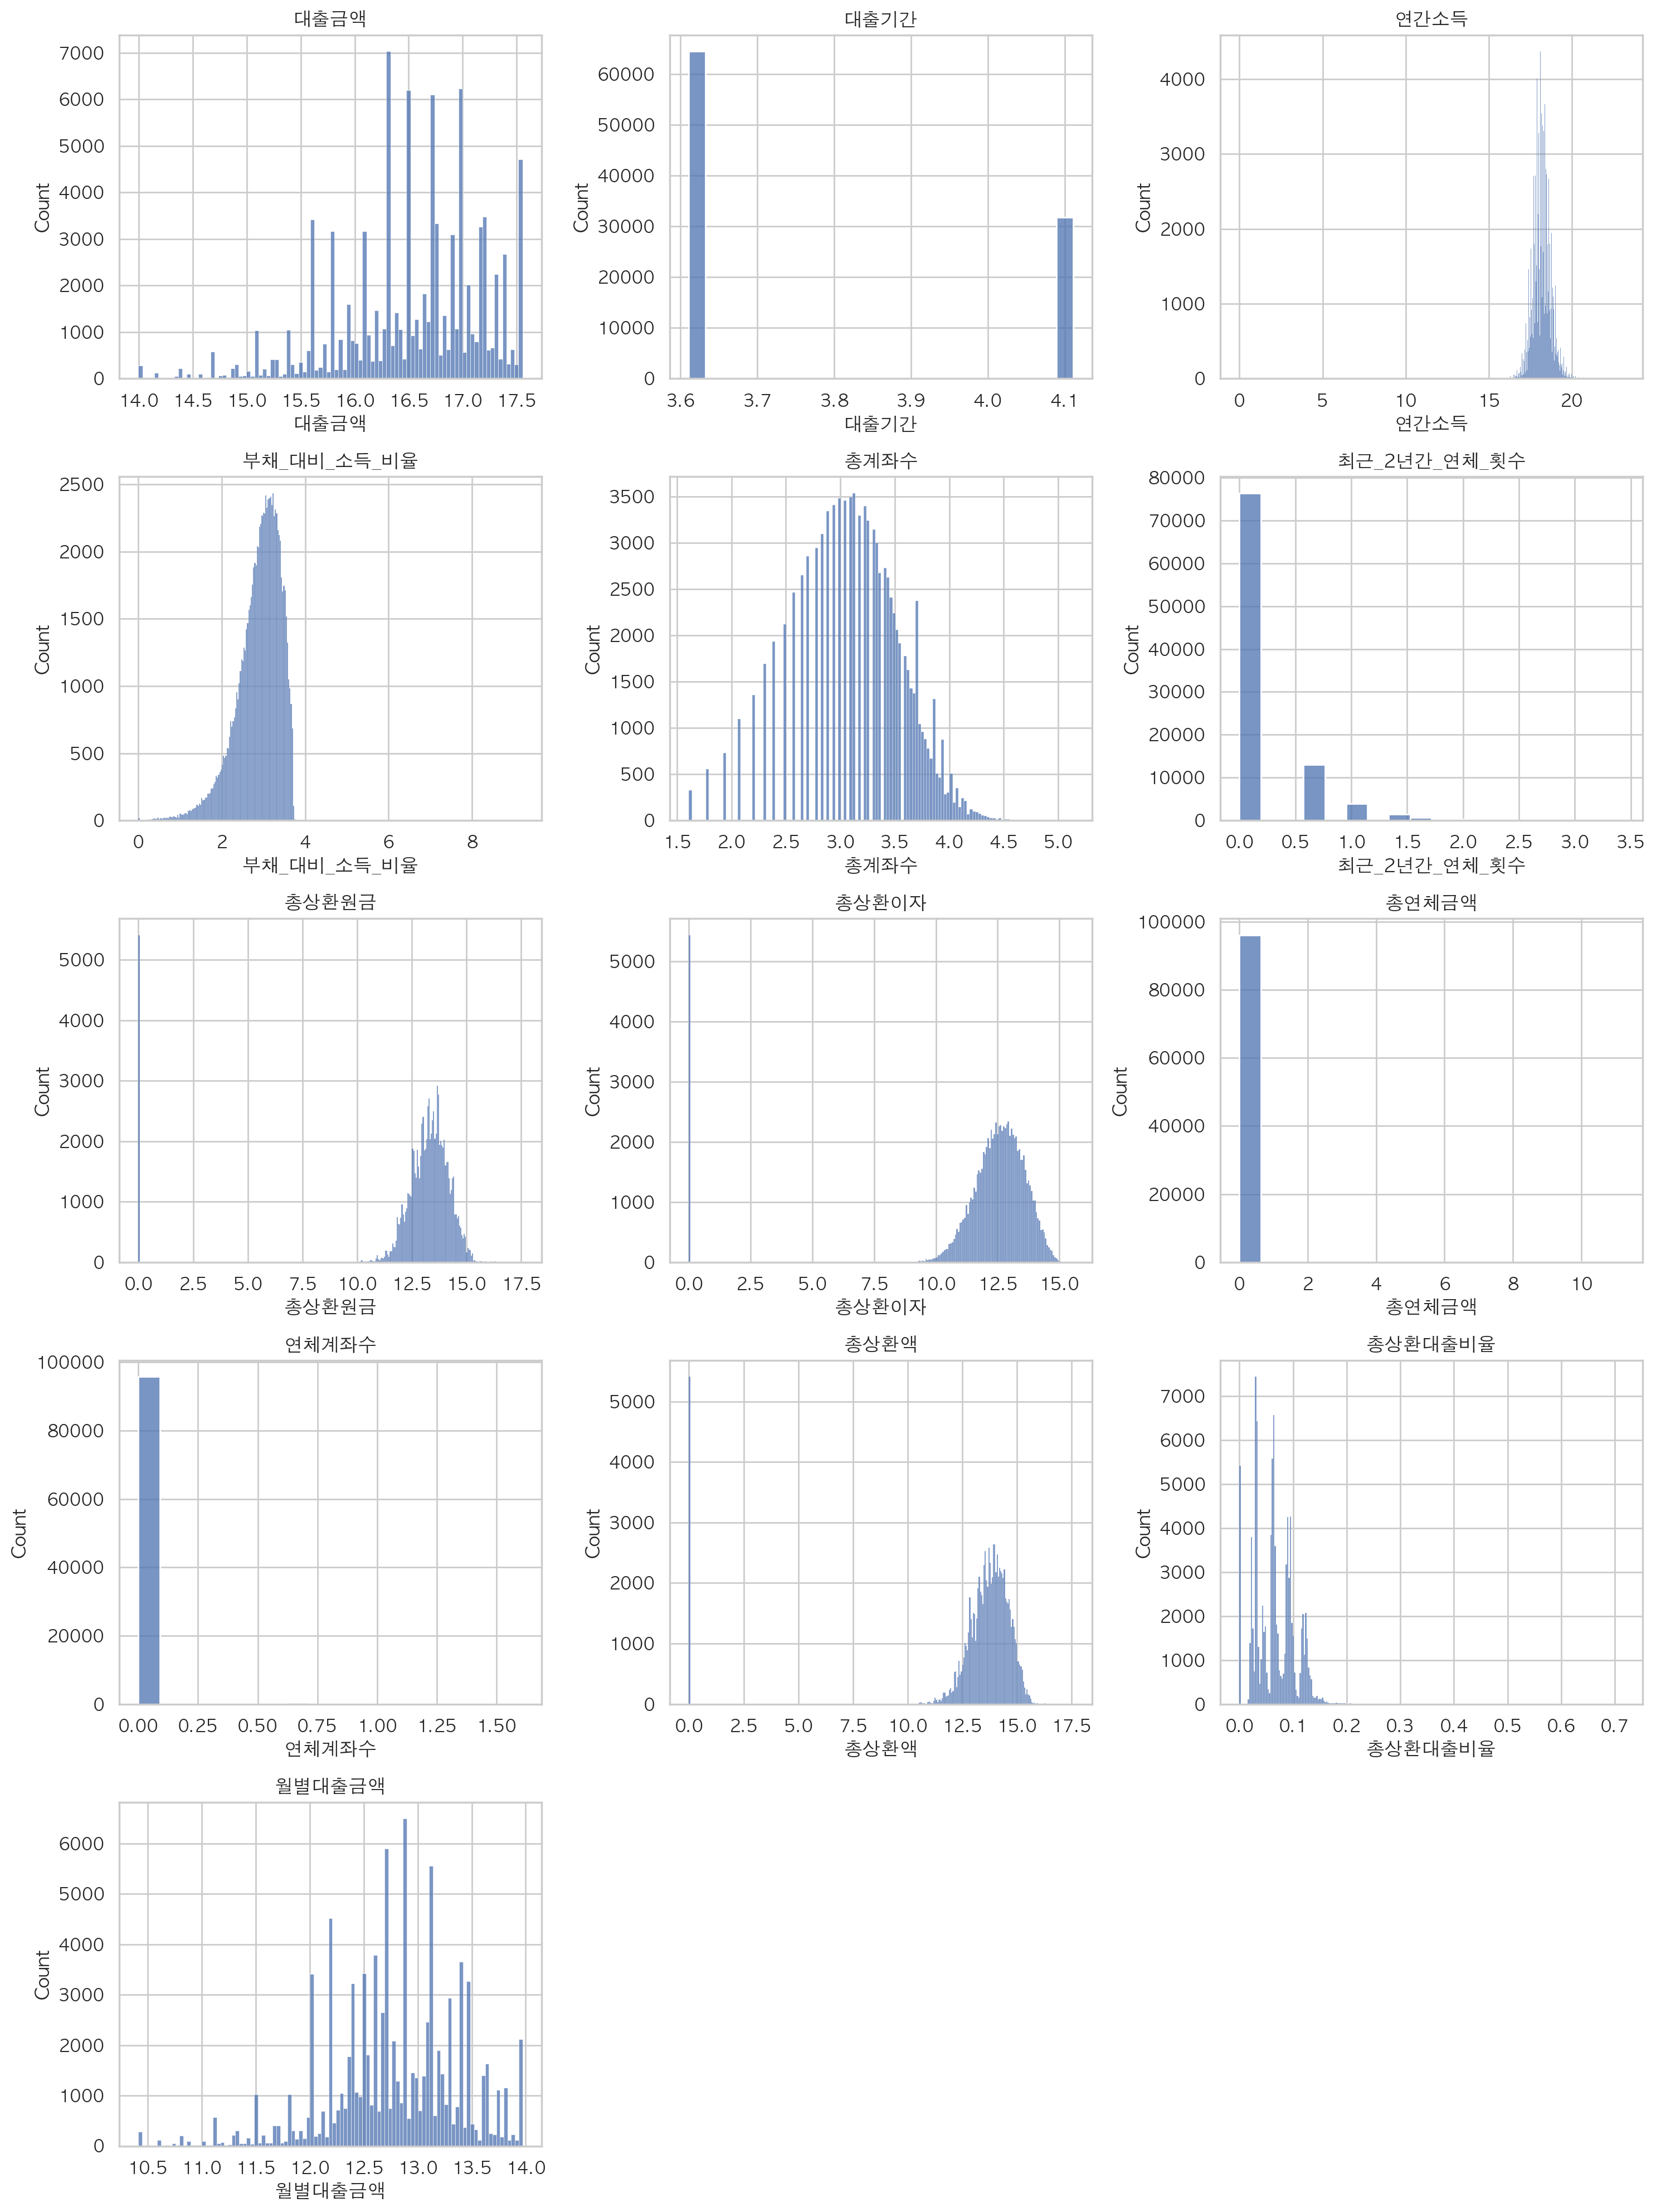

In [62]:
#로그스케일 변환 후 시각화
get_3_hist(train_df, numeric_columns)

In [63]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler

In [64]:
# StandardScaler 객체 생성
s_scaler = StandardScaler()

In [65]:
# 선택한 컬럼들에 대해 스케일링 적용
train_df[numeric_columns] = s_scaler.fit_transform(train_df[numeric_columns])

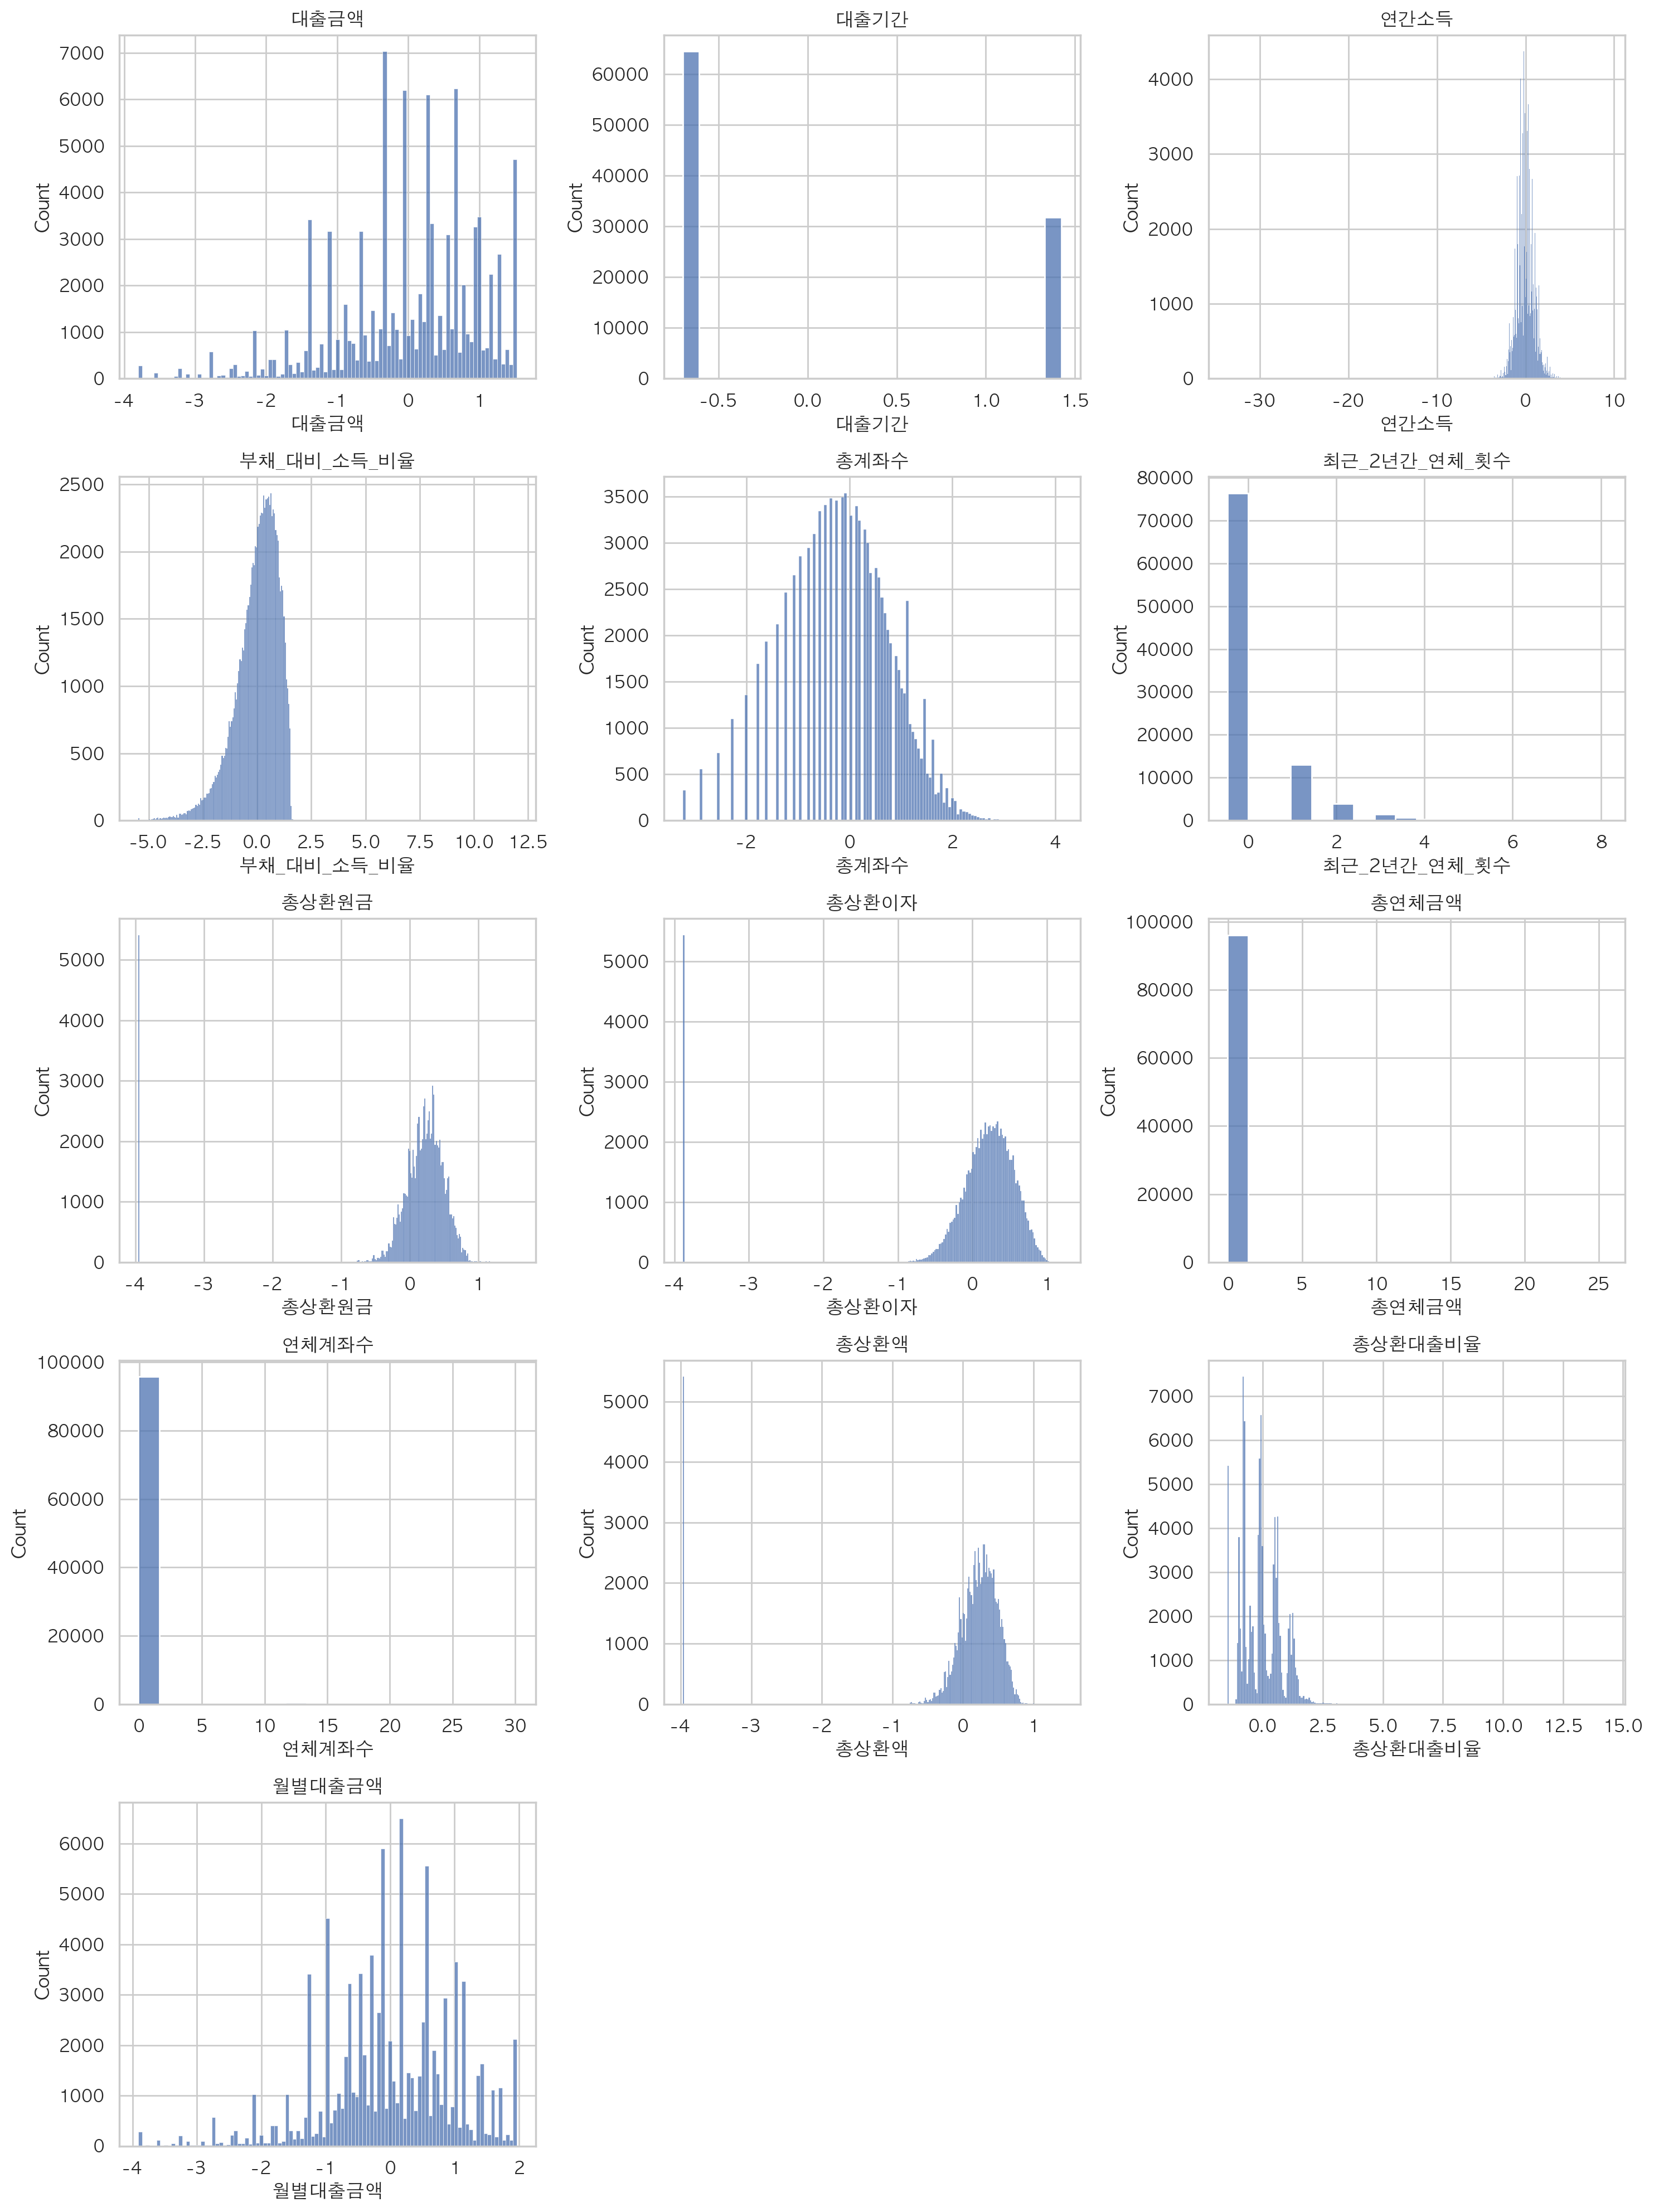

In [66]:
# 스텐다드 스케일 변환 후 시각화
get_3_hist(train_df, numeric_columns)

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96293 entries, 0 to 96293
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96293 non-null  object 
 1   대출금액          96293 non-null  float64
 2   대출기간          96293 non-null  float64
 3   근로기간          96293 non-null  object 
 4   주택소유상태        96293 non-null  object 
 5   연간소득          96293 non-null  float64
 6   부채_대비_소득_비율   96293 non-null  float64
 7   총계좌수          96293 non-null  float64
 8   대출목적          96293 non-null  object 
 9   최근_2년간_연체_횟수  96293 non-null  float64
 10  총상환원금         96293 non-null  float64
 11  총상환이자         96293 non-null  float64
 12  총연체금액         96293 non-null  float64
 13  연체계좌수         96293 non-null  float64
 14  대출등급          96293 non-null  object 
 15  총상환액          96293 non-null  float64
 16  총상환대출비율       96293 non-null  float64
 17  월별대출금액        96293 non-null  float64
dtypes: float64(13), object(5)


In [69]:
# 범주형데이터 인코딩

from sklearn.preprocessing import LabelEncoder

In [71]:
# LabelEncoder 인스턴스 생성
label_encoder = LabelEncoder()

In [72]:
encoding_list = ['근로기간', '주택소유상태', '대출목적', '대출등급']

In [73]:
# 각 컬럼에 대해 라벨 인코딩 수행
for column in encoding_list:
    train_df[column] = label_encoder.fit_transform(train_df[column])

In [74]:
train_df.head(3)

ID      대출금액      대출기간  근로기간  주택소유상태      연간소득  부채_대비_소득_비율  \
0  TRAIN_00000 -0.290341 -0.702442     7       2 -0.197415     0.186352   
1  TRAIN_00001 -0.075803  1.423606     1       0  0.908008     0.487892   
2  TRAIN_00002 -0.349141 -0.702442     6       0  0.335263    -1.195917   

       총계좌수  대출목적  최근_2년간_연체_횟수     총상환원금     총상환이자     총연체금액    연체계좌수  대출등급  \
0 -0.812903     1     -0.468579 -3.961847 -3.888603 -0.043345 -0.07391     2   
1 -0.148162    10     -0.468579  0.077803  0.154446 -0.043345 -0.07391     1   
2 -0.947621     1     -0.468579  0.364499  0.013153 -0.043345 -0.07391     0   

       총상환액   총상환대출비율    월별대출금액  
0 -3.972200 -1.473219 -0.041131  
1  0.096690 -0.563579 -0.648855  
2  0.272583  0.424442 -0.105950

In [76]:
train_df['근로기간'].unique()

array([ 7,  1,  6,  9, 11, 10,  3,  0,  4,  8,  5,  2])

In [77]:
train_df['주택소유상태'].unique()

array([2, 0, 1])

In [78]:
train_df['대출목적'].unique()

array([ 1, 10,  8, 11,  4,  6,  3,  2,  0,  5,  9,  7])

In [79]:
train_df['대출등급'].unique()

array([2, 1, 0, 3, 5, 6, 4])

In [80]:
# shap import

import shap

In [81]:
# train set을 train과 test로 나누기

from sklearn.model_selection import train_test_split

In [82]:
train_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급',
       '총상환액', '총상환대출비율', '월별대출금액'],
      dtype='object')

In [83]:
x_list = ['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수',
       '총상환액', '총상환대출비율', '월별대출금액']

In [85]:
X = train_df[x_list] 
y = train_df['대출등급']

# Train set과 Test set으로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72219, 16)
(24074, 16)
(72219,)
(24074,)


In [87]:
X_train.head(3)

대출금액      대출기간  근로기간  주택소유상태      연간소득  부채_대비_소득_비율      총계좌수  \
67899 -0.233760 -0.702442     1       2 -1.480860     0.844691  0.499256   
1176   0.673070 -0.702442    10       2 -0.814272     0.180626 -0.812903   
24038  1.440799 -0.702442     1       0  0.748440     0.297383  0.033465   

       대출목적  최근_2년간_연체_횟수     총상환원금     총상환이자     총연체금액    연체계좌수      총상환액  \
67899     1      1.264010  0.337725  0.410835 -0.043345 -0.07391  0.344102   
1176      1     -0.468579  0.635354  0.623733 -0.043345 -0.07391  0.602196   
24038     1     -0.468579  0.709015  0.666657 -0.043345 -0.07391  0.664314   

        총상환대출비율    월별대출금액  
67899  0.731619  0.021241  
1176   1.293105  1.020891  
24038  0.591453  1.867203

In [88]:
# 머신러닝모델 라이브러리 

from sklearn.tree import DecisionTreeClassifier #할당받은거
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier #할당받은거
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier #할당받은거

# 평가 라이브러리

from sklearn.metrics import accuracy_score, f1_score

In [89]:
# 우선 feature importance로 중요변수를 확인하고 제일 성능이 좋은 파라미터로 shap 라이브러리로 보기

In [ ]:
# 1. DecisionTreeClassifier 모델링

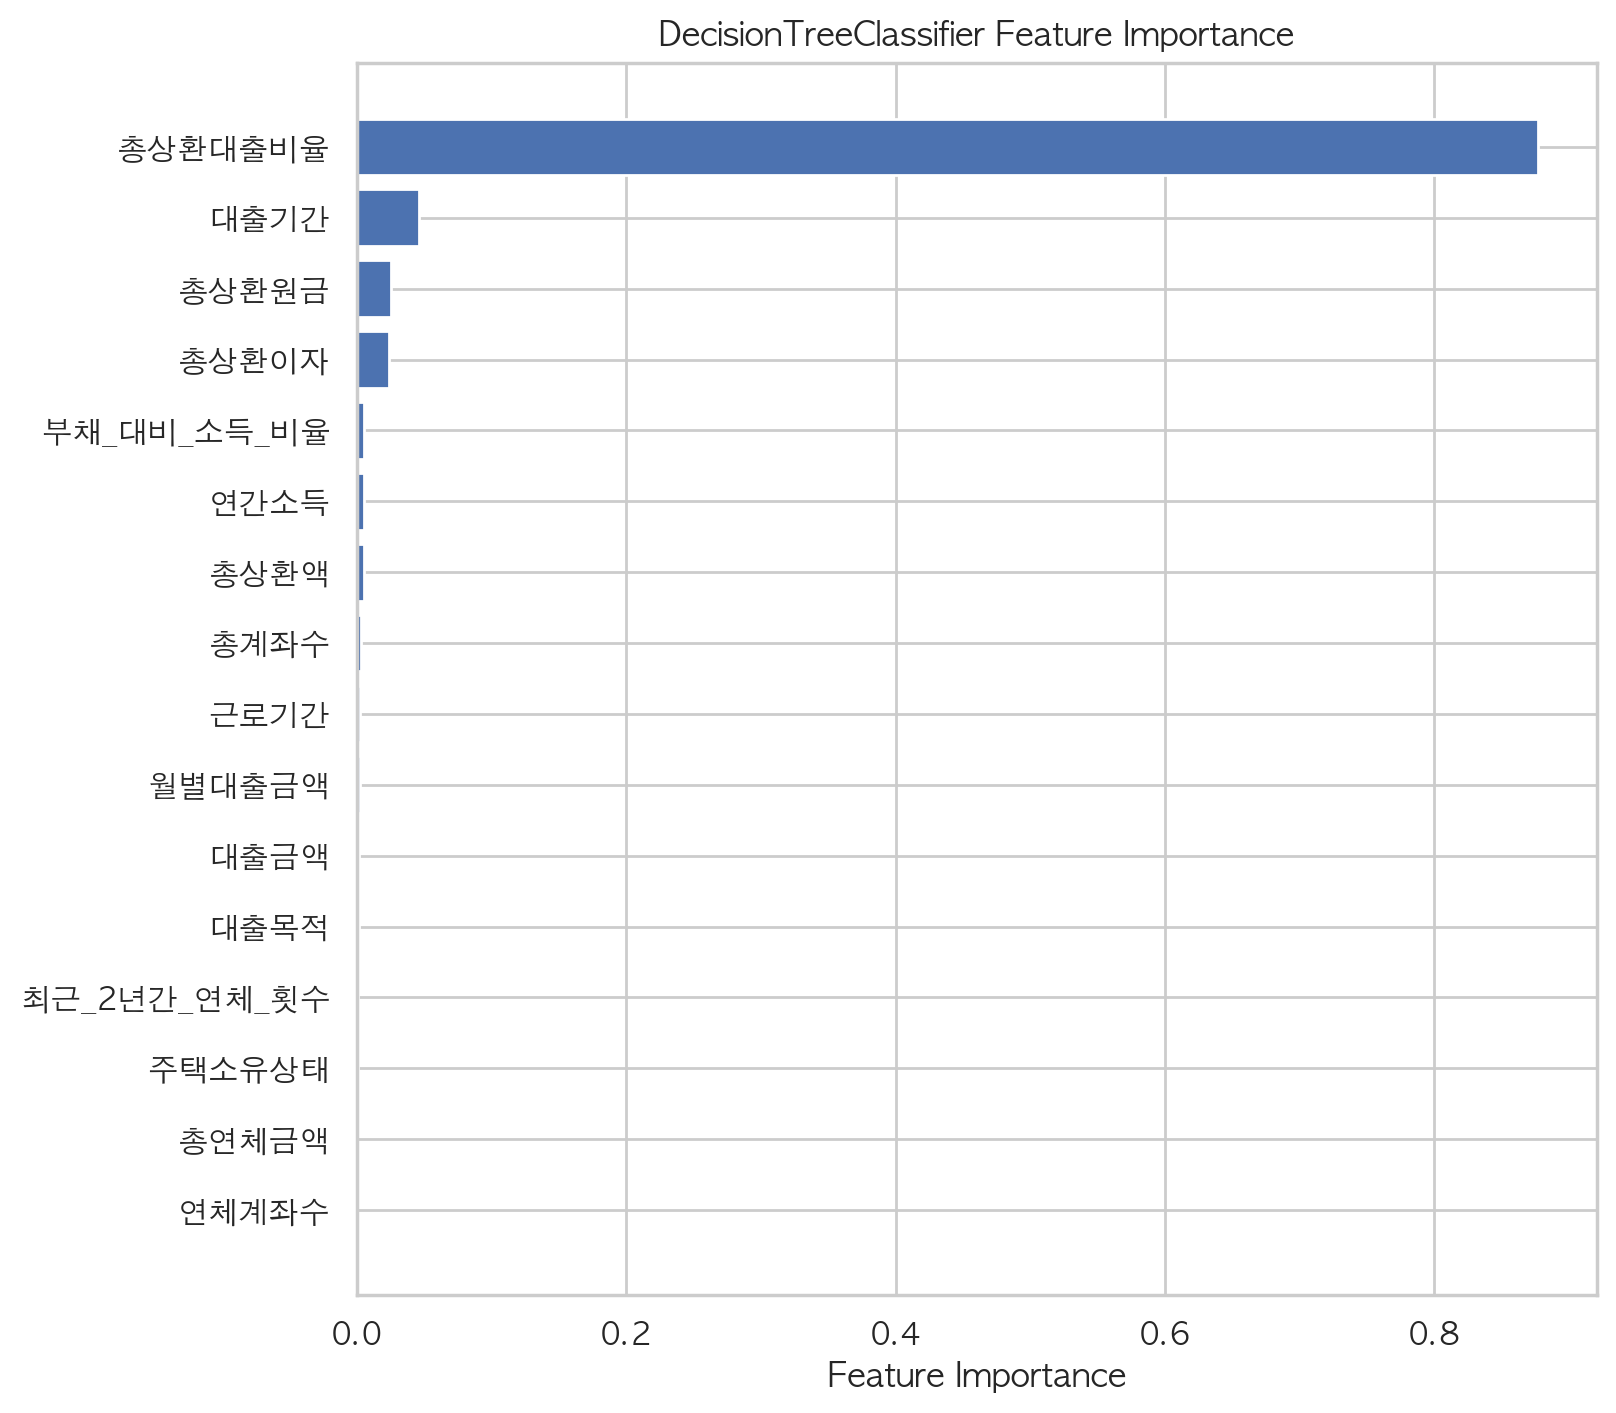

accuracy        F1
train  0.857697  0.858059
test   0.824375  0.824429

In [90]:
# 1. DecisionTreeClassifier 
# 1-1 (max_depth=14)

dt_model = DecisionTreeClassifier(max_depth=14, random_state = 42)
dt_model.fit(X_train, y_train)

# 피처 중요도 얻기
feature_importances = dt_model.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('DecisionTreeClassifier Feature Importance')
plt.show()

y_pred_train = model_dtc.predict(X_train)
y_pred_test = model_dtc.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

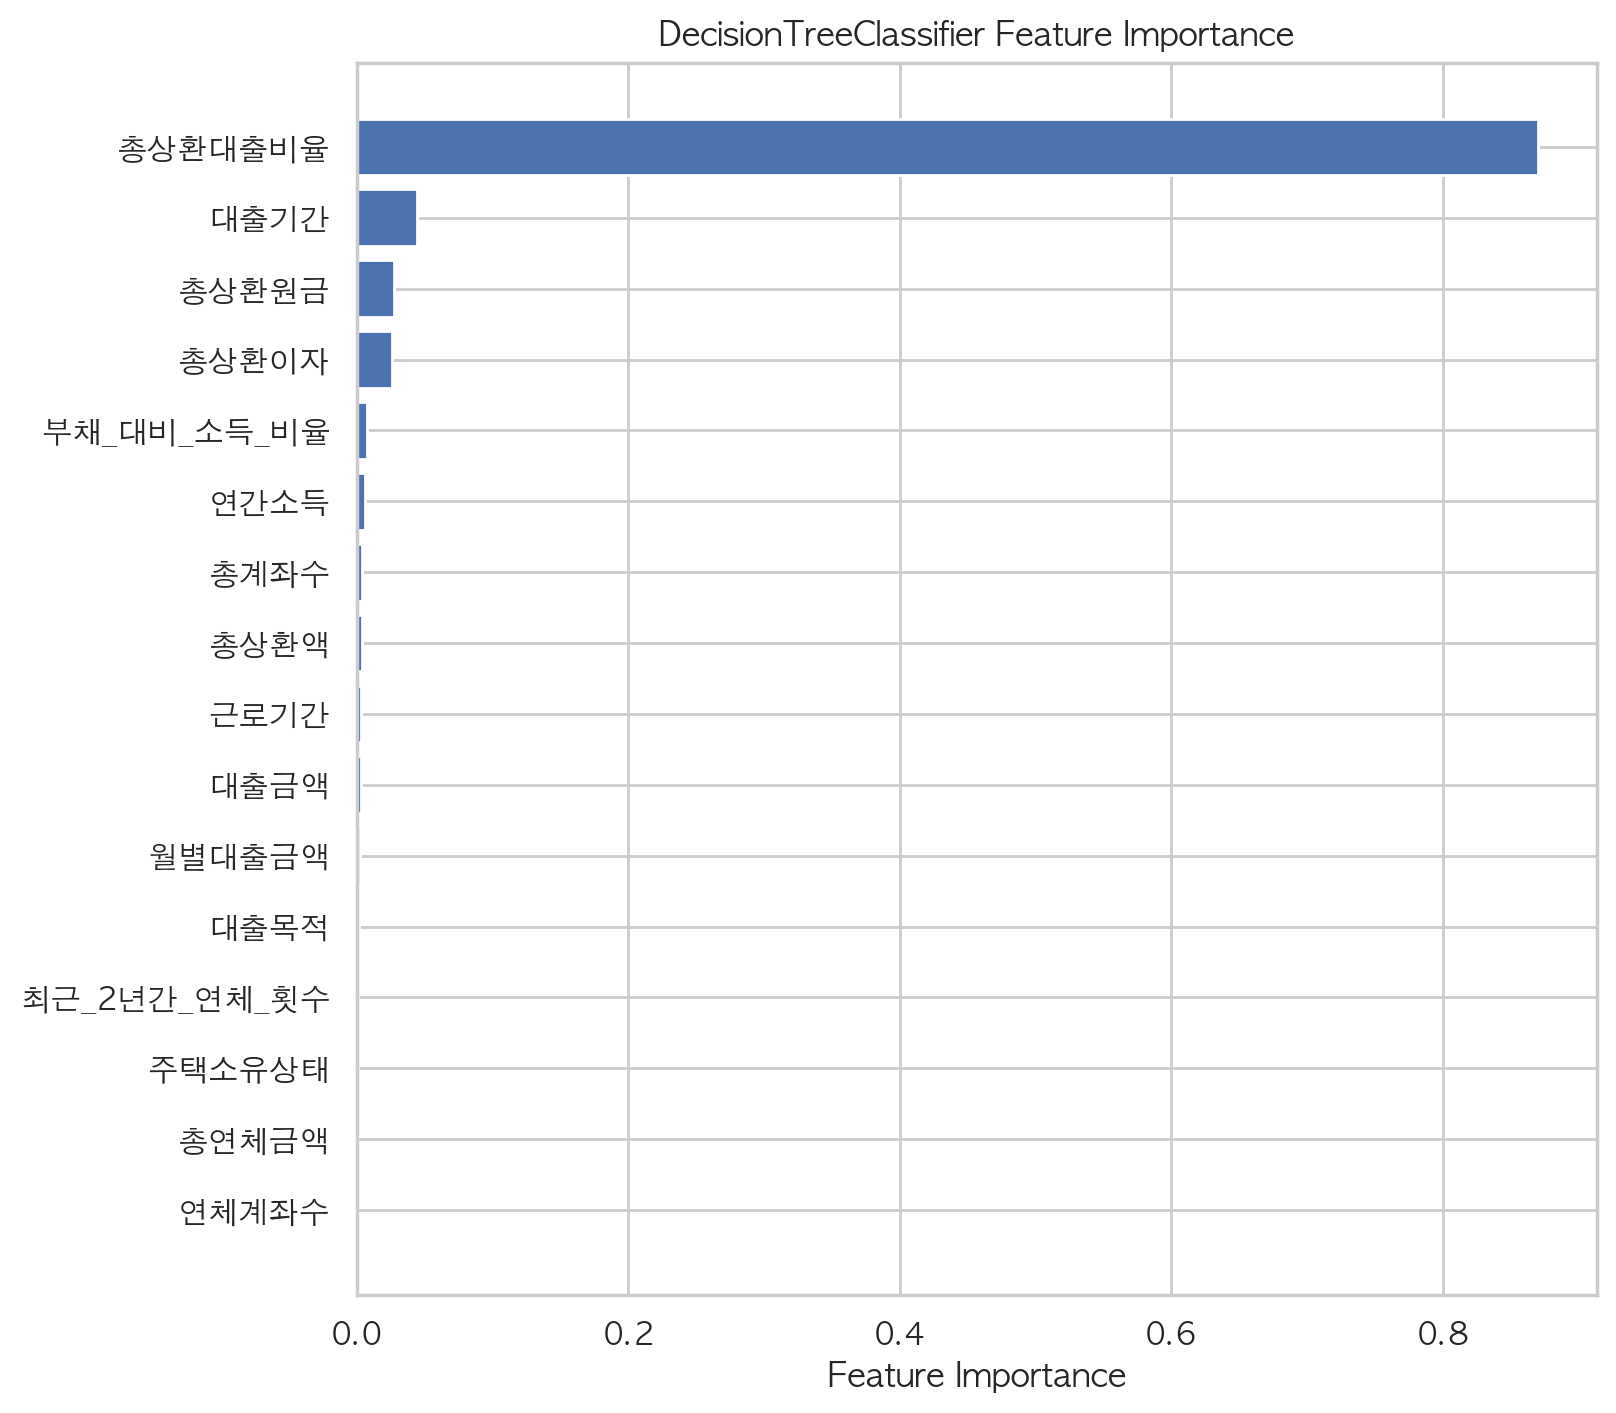

accuracy        F1
train  0.877359  0.877485
test   0.838332  0.838112

In [91]:
# 1. DecisionTreeClassifier 
# 1-2 (max_depth=15)
dt_model = DecisionTreeClassifier(max_depth=15, random_state = 42)
dt_model.fit(X_train, y_train)

# 피처 중요도 얻기
feature_importances = dt_model.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('DecisionTreeClassifier Feature Importance')
plt.show()

y_pred_train = model_dtc.predict(X_train)
y_pred_test = model_dtc.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

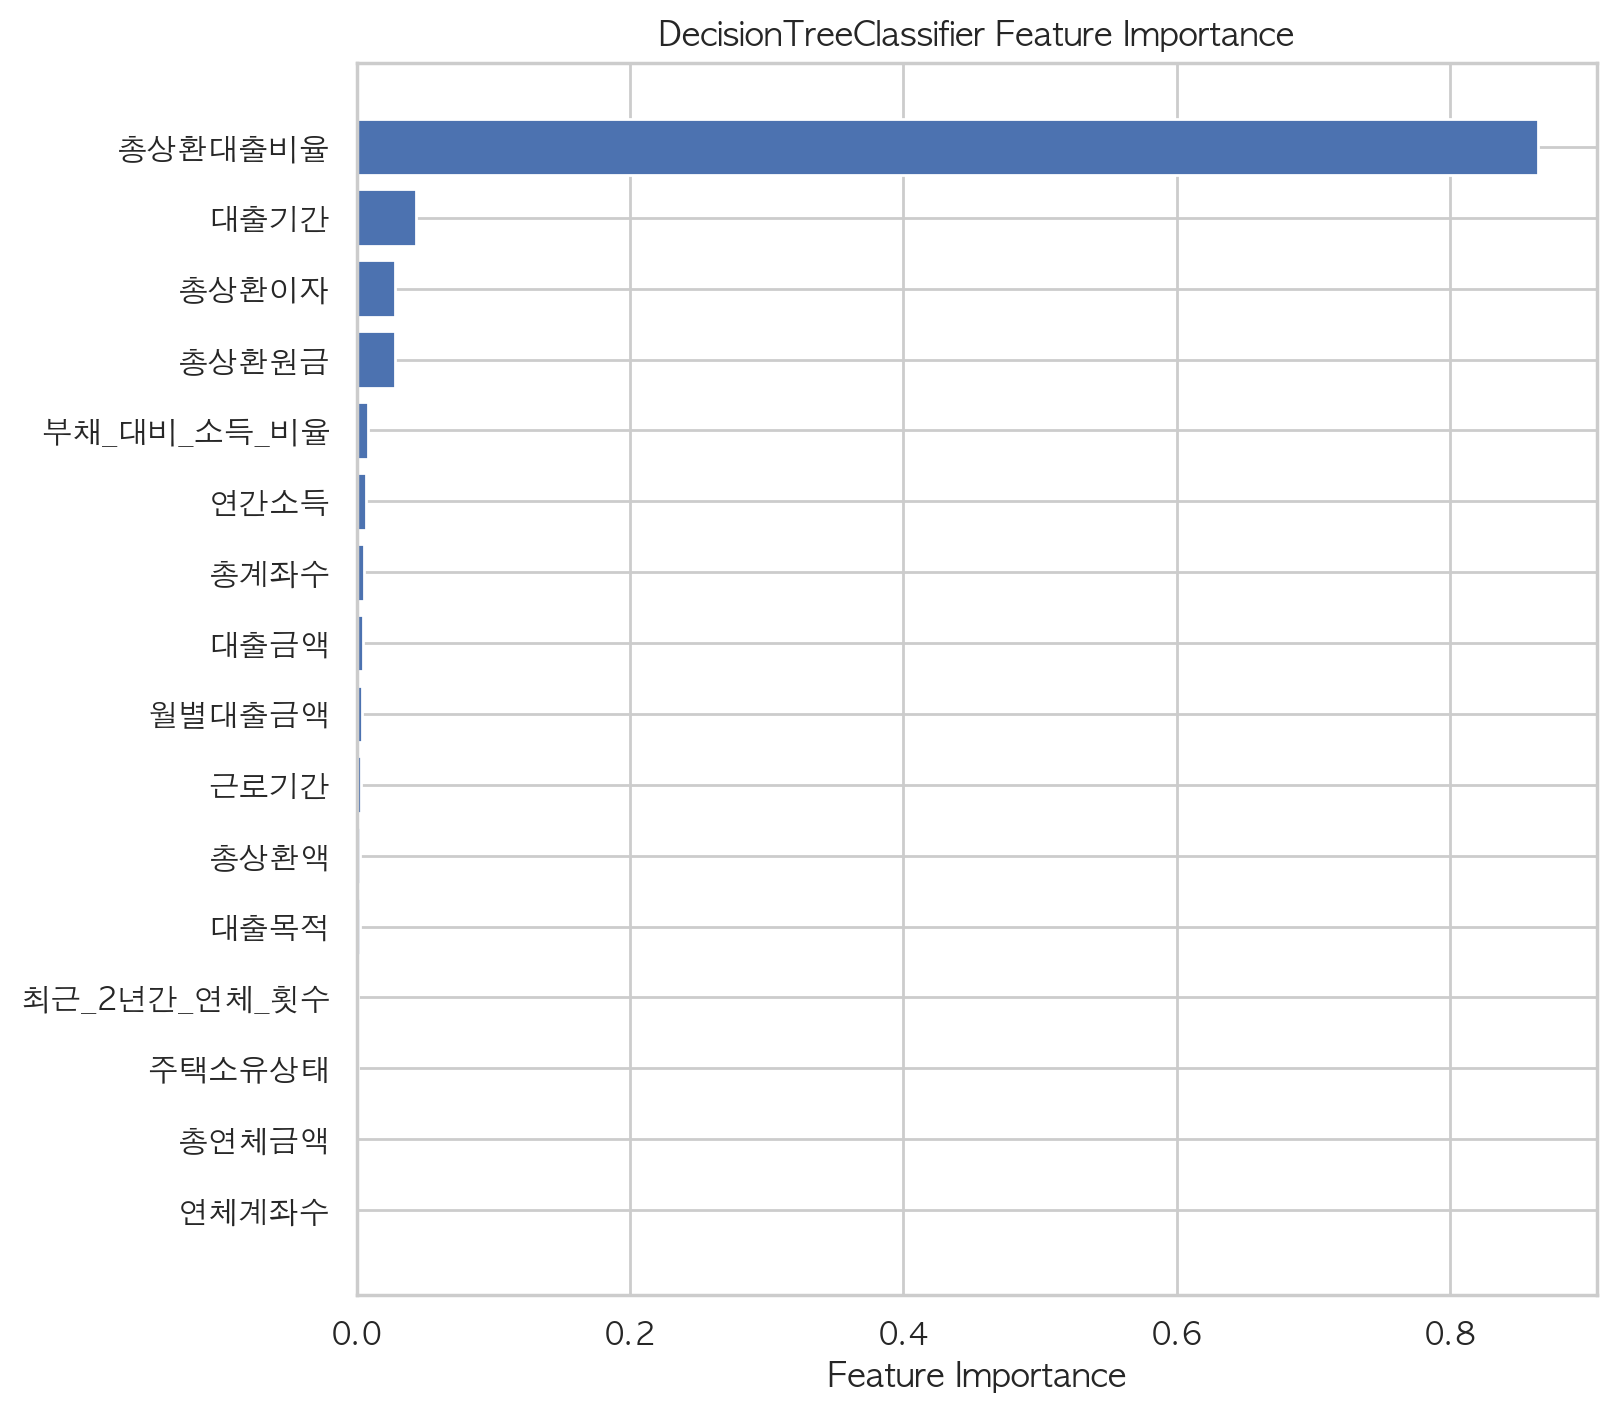

accuracy        F1
train  0.890998  0.891234
test   0.847263  0.847252

In [92]:
# 1. DecisionTreeClassifier 
# 1-3 (max_depth=16)
dt_model = DecisionTreeClassifier(max_depth=16, random_state = 42)
dt_model.fit(X_train, y_train)

# 피처 중요도 얻기
feature_importances = dt_model.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('DecisionTreeClassifier Feature Importance')
plt.show()

y_pred_train = model_dtc.predict(X_train)
y_pred_test = model_dtc.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

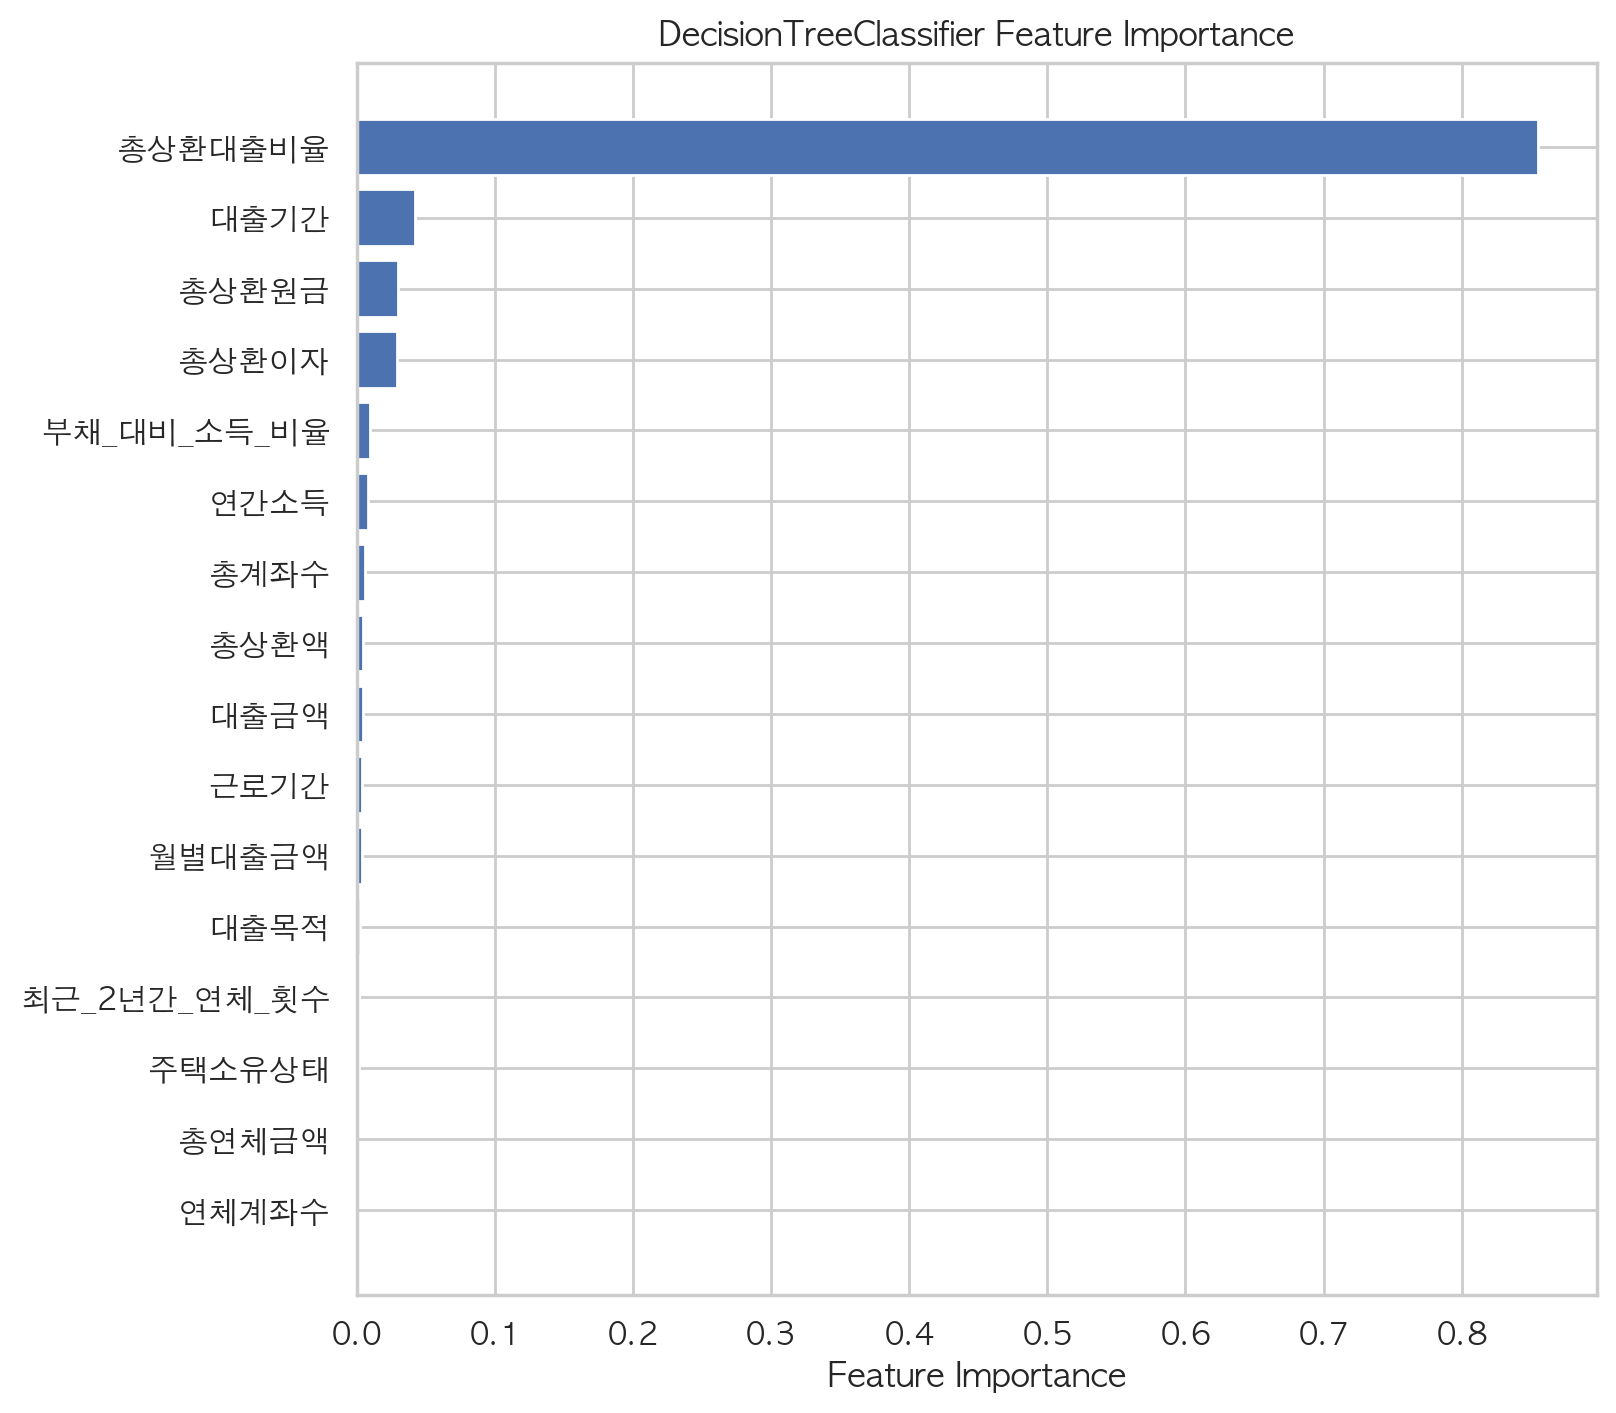

accuracy        F1
train  0.903516  0.903557
test   0.853369  0.853109

In [93]:
# 1. DecisionTreeClassifier 
# 1-4 (max_depth=17)
dt_model = DecisionTreeClassifier(max_depth=17, random_state = 42)
dt_model.fit(X_train, y_train)

# 피처 중요도 얻기
feature_importances = dt_model.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('DecisionTreeClassifier Feature Importance')
plt.show()

y_pred_train = model_dtc.predict(X_train)
y_pred_test = model_dtc.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

In [96]:
# 그리드서치 사용해서 최적의 값 찾기

from sklearn.model_selection import GridSearchCV

In [99]:
%%time

dt_model = DecisionTreeClassifier()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid = {
    'max_depth': [17, 18, 19, 20],                        # 의사결정트리의 최대 깊이
    'criterion': ['gini', 'entropy'],                  # 불순도(impurity) 계산에 사용할 기준 ('gini': Gini 불순도, 'entropy': 엔트로피)
    'random_state': [42]                              # 난수 발생 시드 값               
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(dt_model, param_grid, cv=5, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_dc = grid_search.best_estimator_
best_params_grid_search_dc = grid_search.best_params_
print("Best Model:", best_model_grid_search_dc)
print("Best Parameters:", best_params_grid_search_dc)

Best Model: DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'random_state': 42}
CPU times: user 1.06 s, sys: 75.8 ms, total: 1.14 s
Wall time: 6.65 s


In [112]:
# DecisionTreeClassifier 모델 생성
# 1-5. max_depth=19

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=19, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.926972  0.926936
test   0.859849  0.859518

In [189]:
# DecisionTreeClassifier 모델 생성
# 1-6. max_depth=19, min_samples_split=3

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=19, random_state=42, min_samples_split=3)
dt_model.fit(X_train, y_train)

y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.923981  0.923882
test   0.860887  0.860491

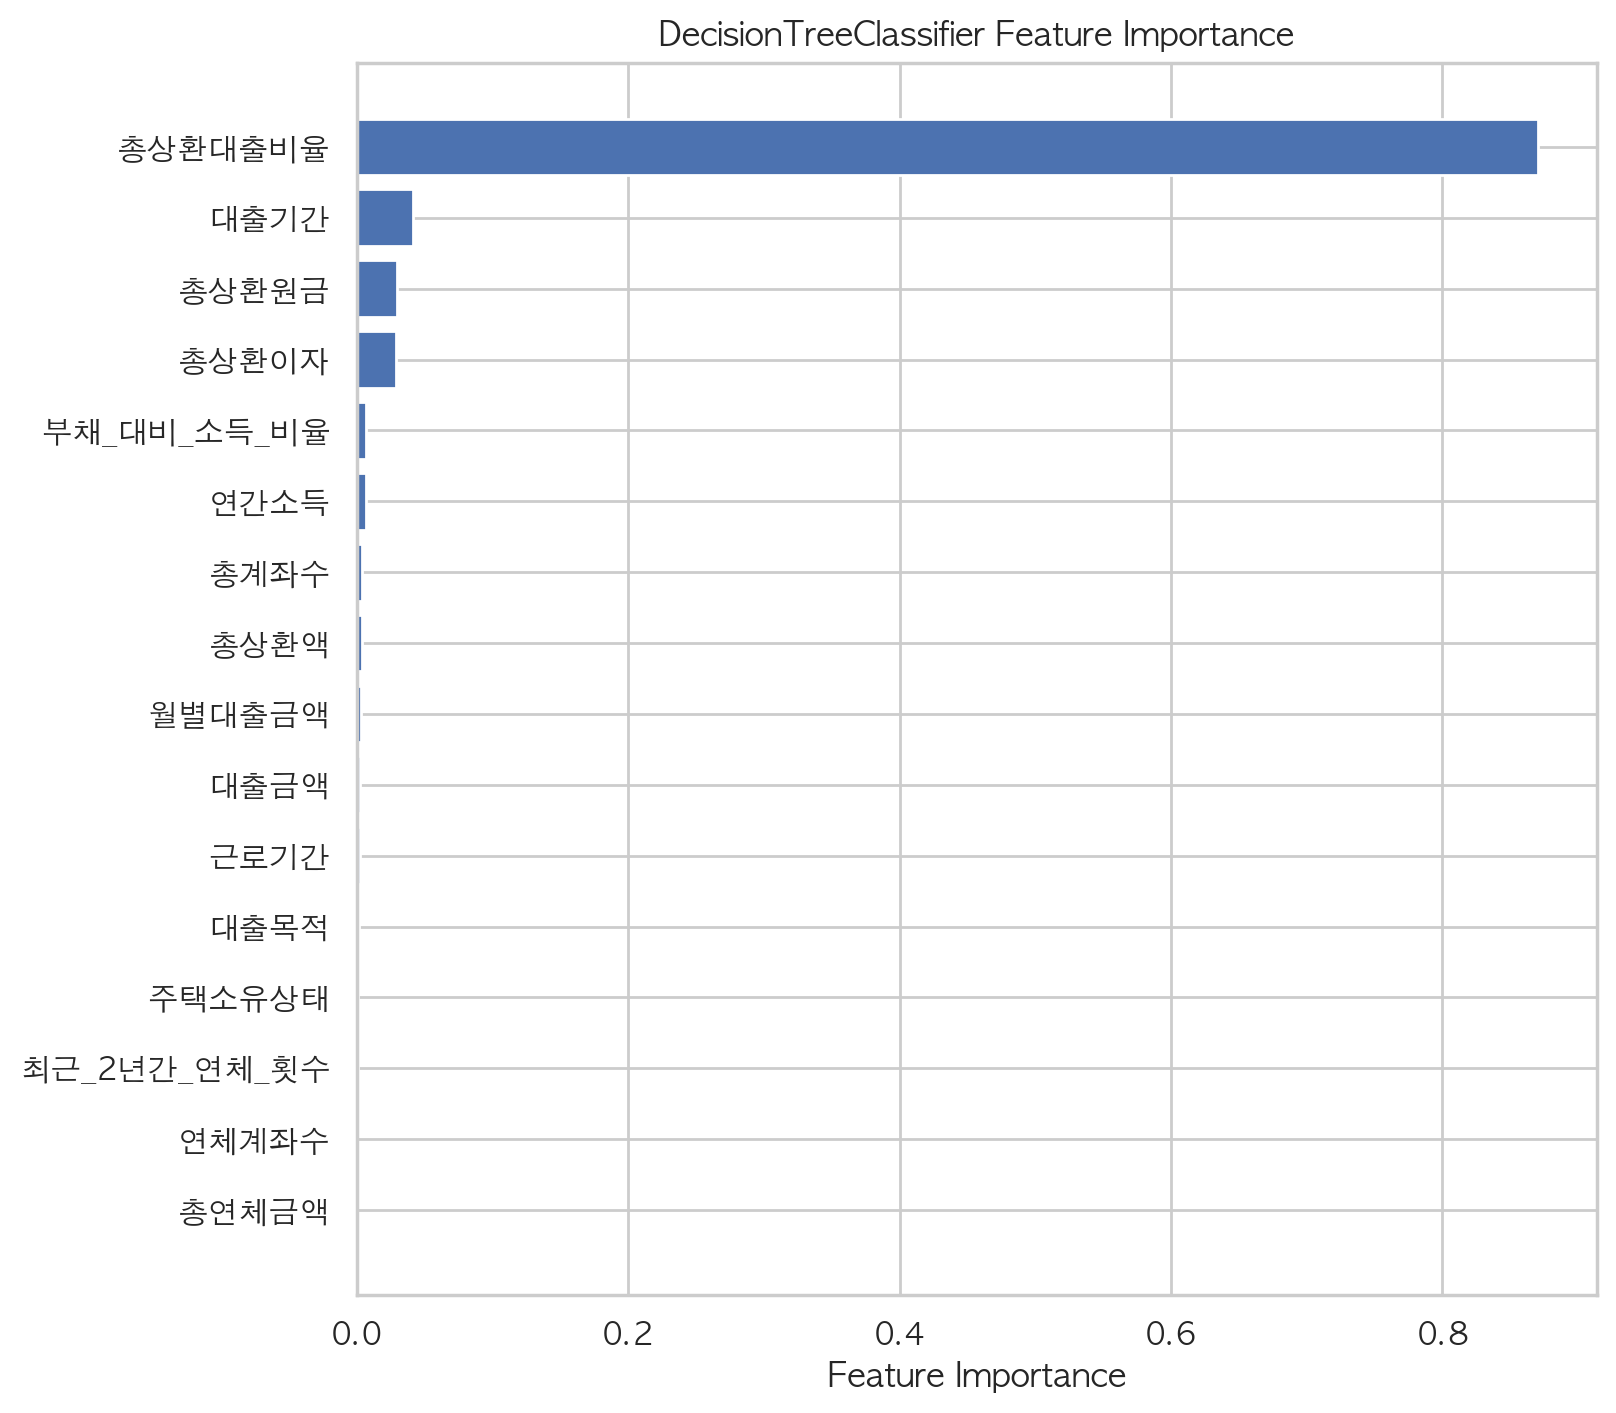

accuracy        F1
train  0.905537  0.905186
test   0.866744  0.866221

In [199]:
# DecisionTreeClassifier 모델 test set 에 적용했을 때 가장 성능이 좋은 하이퍼 파라미터로 feature importance 확인
# 1-7. max_depth=19, min_samples_split=3, min_samples_leaf=5

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=19, random_state=42, min_samples_split=3, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

# 피처 중요도 얻기
feature_importances = dt_model.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('DecisionTreeClassifier Feature Importance')
plt.show()

y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

In [200]:
shap.initjs()

In [204]:
# explainer = shap.TreeExplainer(dt_model)
# shap_values = explainer.shap_values(X_train)

In [205]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

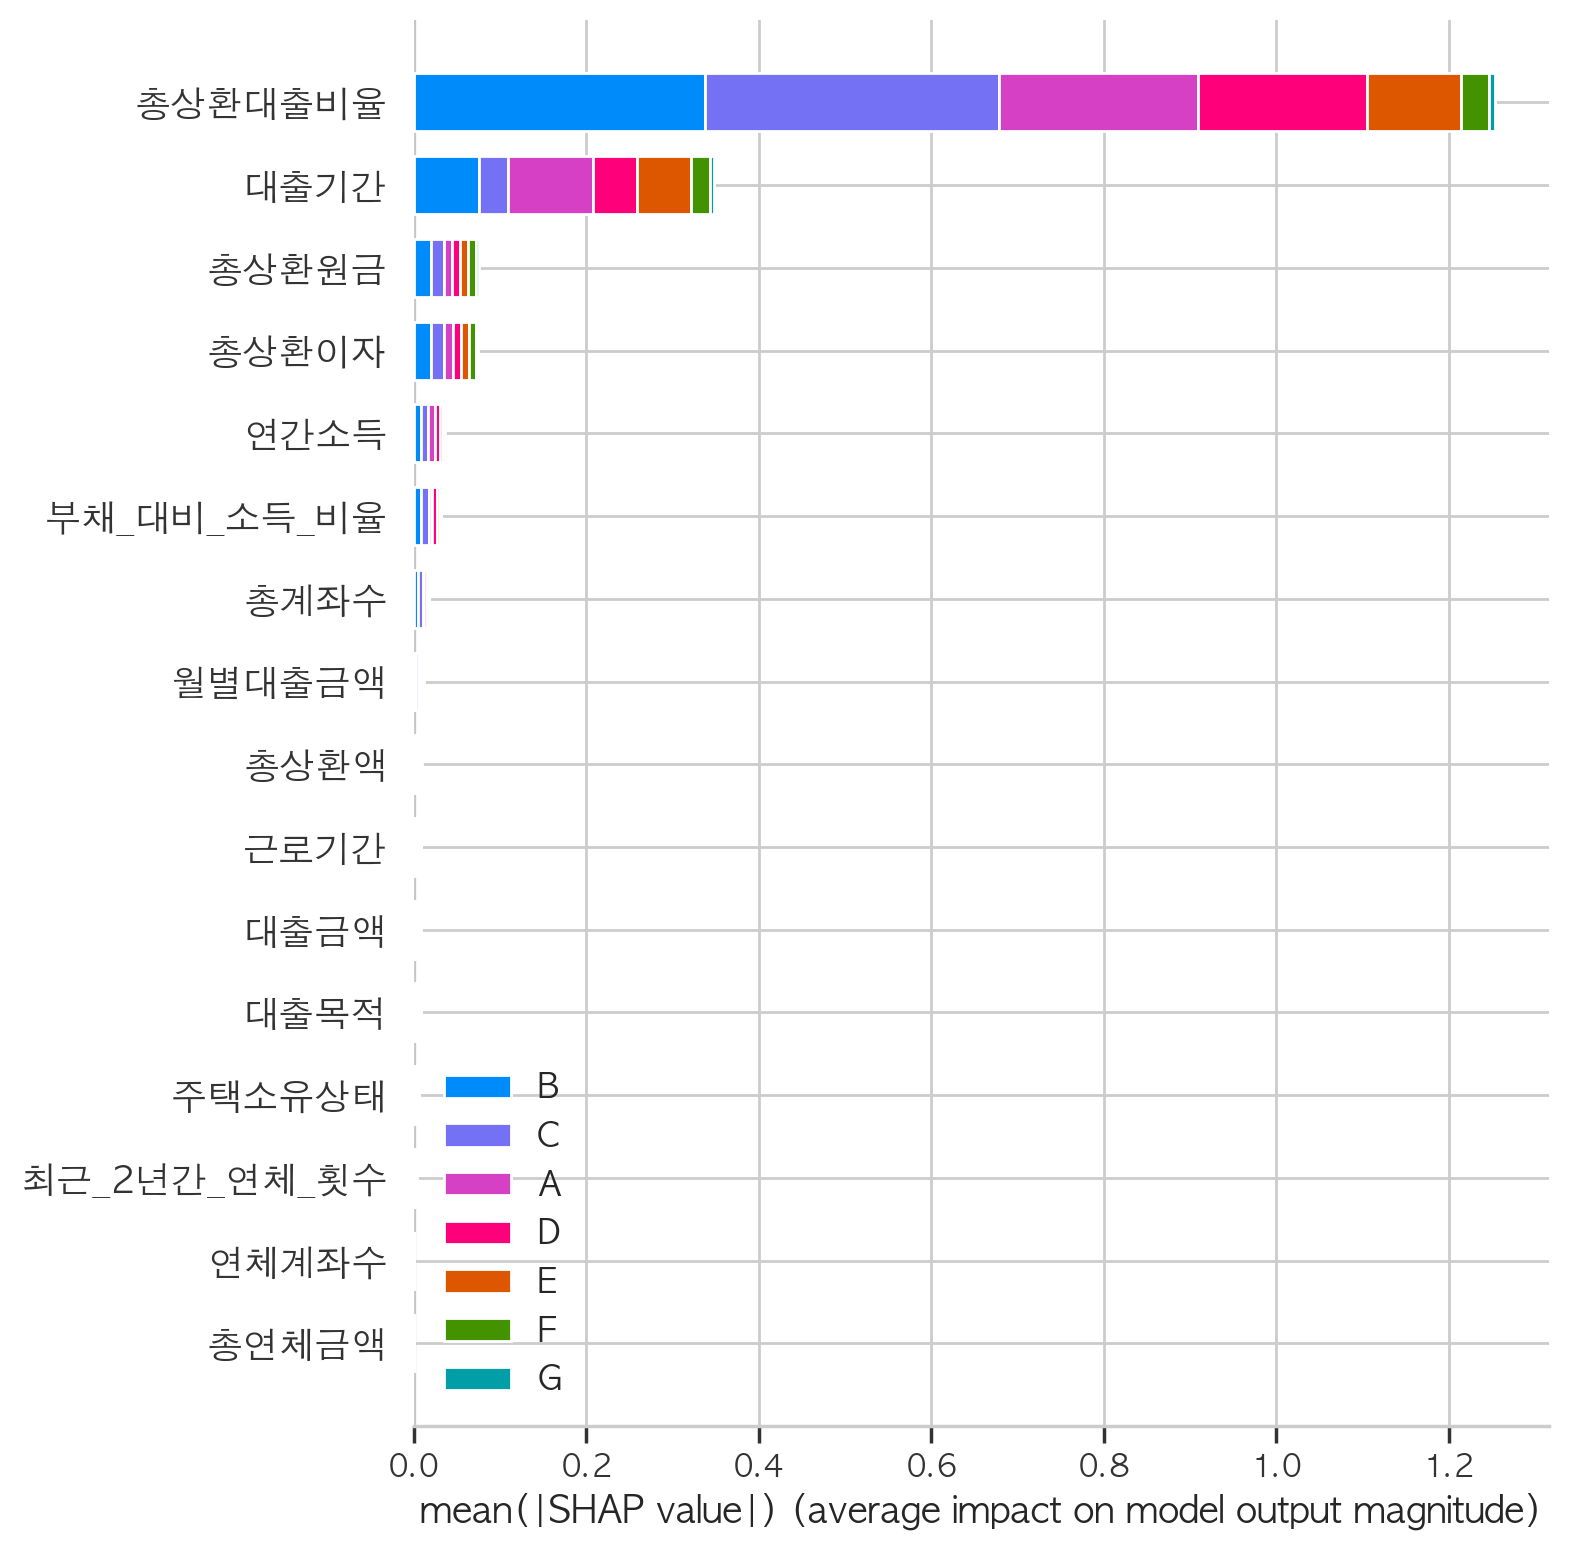

In [206]:
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_test, approximate=True)
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=class_names)

#생성된 explainer를 사용하여 테스트 데이터 (X_test)에 대한 SHAP 값들을 계산합니다. 
# approximate=True는 SHAP 값들을 근사적으로 계산하라는 옵션입니다. 이는 계산 시간을 단축할 수 있습니다.

In [211]:
# 2. GradientBoostingClassifier 
# 2-1. max_depth=5

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=5) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.889364  0.889466
test   0.859060  0.858738

In [213]:
# 2. GradientBoostingClassifier 
# 2-2. max_depth=6

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=6) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.917030  0.917111
test   0.873307  0.872931

In [214]:
# 2. GradientBoostingClassifier 
# 2-3. max_depth=7

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=7) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.943311  0.943377
test   0.882321  0.881964

In [215]:
# 2. GradientBoostingClassifier 
# 2-4. max_depth=8

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=8) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.967349  0.967379
test   0.890670  0.890366

In [216]:
# 2. GradientBoostingClassifier 
# 2-5. max_depth=9

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=9) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.986306  0.986312
test   0.893744  0.893451

In [217]:
# 2. GradientBoostingClassifier 
# 2-6. max_depth=10

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=10) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.996012  0.996013
test   0.895489  0.895038

In [218]:
# 2. GradientBoostingClassifier 
# 2-7. max_depth=11

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=11) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.999598  0.999598
test   0.897857  0.897430

In [219]:
# 2. GradientBoostingClassifier 
# 2-8. max_depth=12

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=12) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.999986  0.999986
test   0.898397  0.897985

In [220]:
# 2. GradientBoostingClassifier 
# 2-9. max_depth=13

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=13) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train   1.00000  1.000000
test    0.89877  0.898345

In [221]:
# 2. GradientBoostingClassifier 
# 2-10. max_depth=14

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=14) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train   1.00000  1.000000
test    0.89931  0.898919

In [222]:
# 2. GradientBoostingClassifier 
# 2-11. max_depth=15

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=15) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.901097  0.900599

In [223]:
# 2. GradientBoostingClassifier 
# 2-12. max_depth=16 => 15보다 성능 떨어짐

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=16) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train   1.00000  1.000000
test    0.89877  0.898286

In [224]:
# 2. GradientBoostingClassifier 
# 2-13. max_depth=15, n_estimators=200 : max_depth가 16이면 성능이 떨어지므로 15로 두고 n_estimators를 변경

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=200, max_depth=15) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.905167  0.904591

In [225]:
# 어떤 n_estimatprs가 성능이 좋을 지 찾기
# 2. GradientBoostingClassifier 
# 2-14. max_depth=5, n_estimators=200 

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=200, max_depth=5) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.920090  0.920179
test   0.876423  0.876138

In [226]:
# 2. GradientBoostingClassifier 
# 2-15. max_depth=5, n_estimators=300 

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=300, max_depth=5) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.938686  0.938759
test   0.885561  0.885251

In [227]:
# 2. GradientBoostingClassifier 
# 2-16. max_depth=5, n_estimators=400 

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=400, max_depth=5) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.952436  0.952501
test   0.892166  0.891838

In [228]:
# 2. GradientBoostingClassifier 
# 2-17. max_depth=5, n_estimators=500 

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=500, max_depth=5) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.962503  0.962550
test   0.895530  0.895194

In [229]:
# 2. GradientBoostingClassifier 
# 2-18. max_depth=5, n_estimators=600 

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=600, max_depth=5) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.970659  0.970699
test   0.900017  0.899658

In [230]:
# 2. GradientBoostingClassifier 
# 2-19. max_depth=5, n_estimators=700 

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=700, max_depth=5) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.976779  0.976807
test   0.901803  0.901419

In [267]:
# 2. GradientBoostingClassifier 
# 2-20. max_depth=5, n_estimators=800 

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=800, max_depth=5) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.981791  0.981812
test   0.902343  0.901948

In [268]:
# 2. GradientBoostingClassifier 
# 2-21. max_depth=5, n_estimators=900 

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=900, max_depth=5) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.985572  0.985585
test   0.903838  0.903443

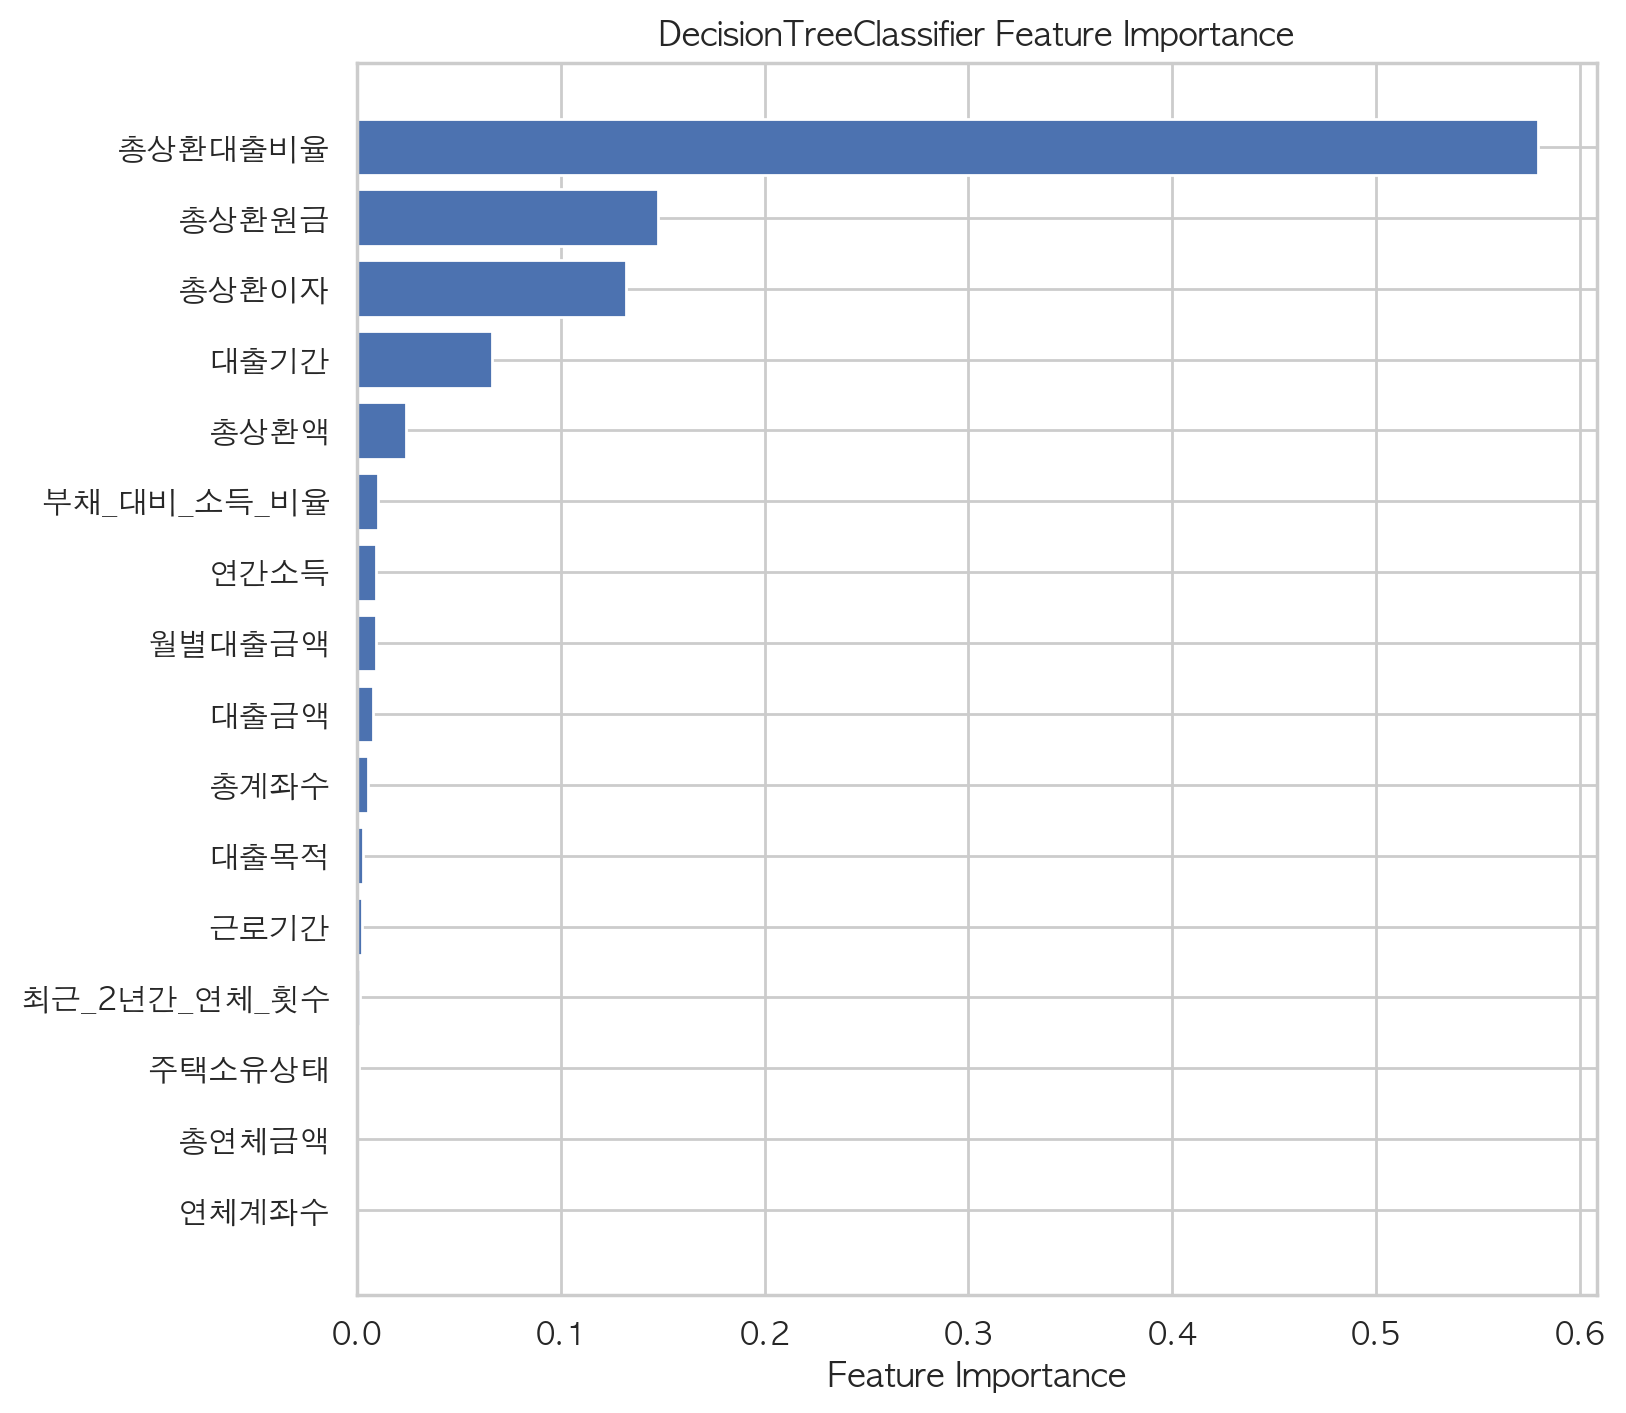

In [278]:
# 피처 중요도 얻기
feature_importances = gb_model.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('DecisionTreeClassifier Feature Importance')
plt.show()

In [283]:
# 2. GradientBoostingClassifier 
# 2-22. max_depth=17, n_estimators=1000 

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=1000, max_depth=17) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.906247  0.905741

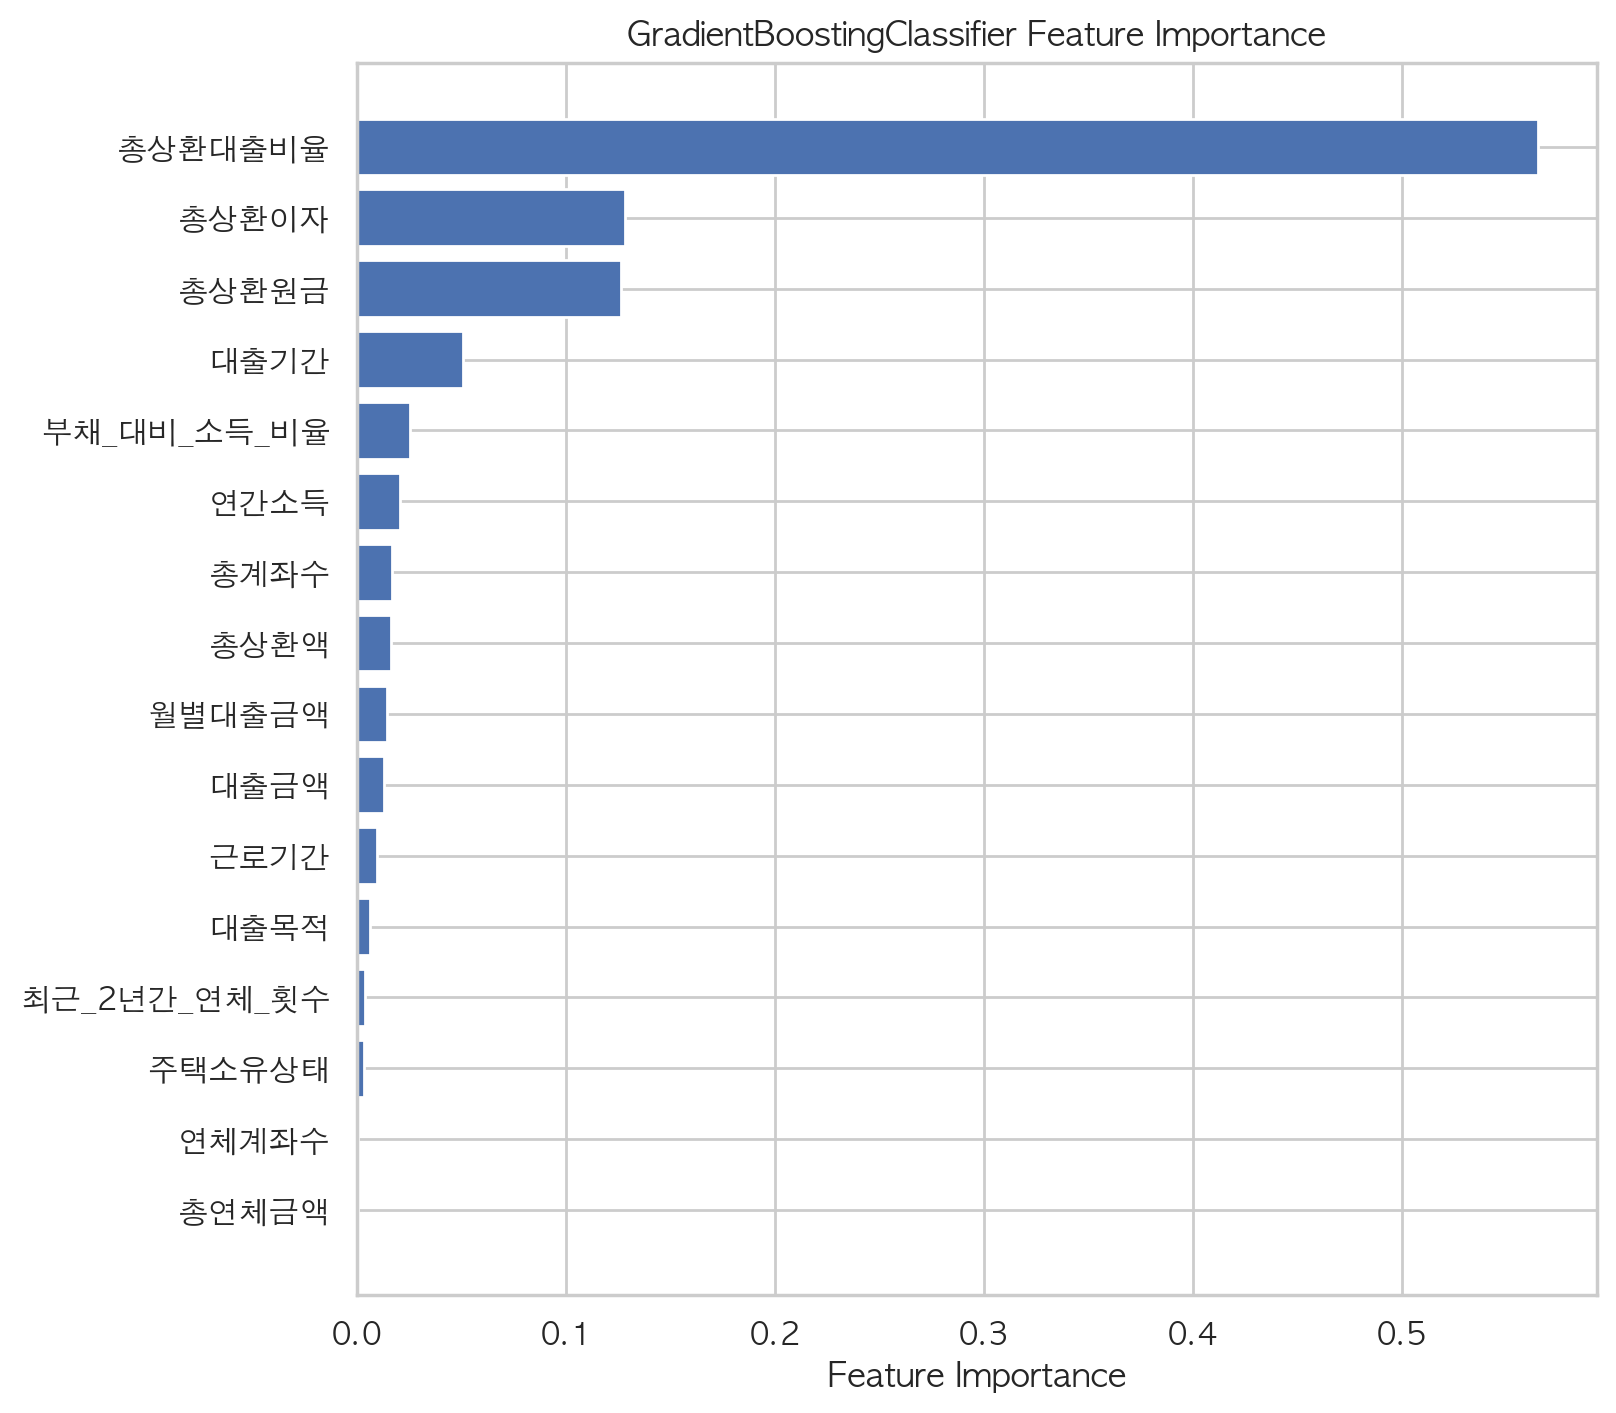

In [287]:
# 피처 중요도 얻기
feature_importances = gb_model.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('GradientBoostingClassifier Feature Importance')
plt.show()

In [315]:
# 2. GradientBoostingClassifier 
# 2-23. max_depth=15, n_estimators=1000 

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=1000, max_depth=15) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.907784  0.907218

In [ ]:
# 피처 중요도 얻기
feature_importances = gb_model.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('GradientBoostingClassifier Feature Importance')
plt.show()

In [231]:
# 2. GradientBoostingClassifier 
# 2-24. max_depth=15, n_estimators=200 

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=200, max_depth=15) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.905167  0.829711

In [ ]:
# 여기서부터 LGBMClassifier 모델

In [232]:
# 3. LGBMClassifier
# 3-1. n_estimators=100, learning_rate=0.2, max_depth=4, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.2, max_depth=4, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.781069  0.666245
test   0.765058  0.645902

In [233]:
# 3. LGBMClassifier
# 3-2. n_estimators=100, learning_rate=0.2, max_depth=5, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.2, max_depth=5, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.872485  0.794816
test   0.825289  0.707474

In [234]:
# 3. LGBMClassifier
# 3-3. n_estimators=100, learning_rate=0.2, max_depth=6, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.2, max_depth=6, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.899168  0.876508
test   0.843109  0.752228

In [235]:
# 3. LGBMClassifier
# 3-4. n_estimators=100, learning_rate=0.2, max_depth=7, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.2, max_depth=7, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.861975  0.741574
test   0.814323  0.671137

In [236]:
# 3. LGBMClassifier
# 3-5. n_estimators=100, learning_rate=0.2, max_depth=8, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.2, max_depth=8, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.894958  0.866819
test   0.833887  0.717854

In [237]:
# 3. LGBMClassifier
# 3-6. n_estimators=100, learning_rate=0.2, max_depth=9, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.2, max_depth=9, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.875116  0.830144
test   0.822173  0.712219

In [238]:
# 3. LGBMClassifier 
# 3-7. n_estimators=100, learning_rate=0.2, max_depth=10, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.2, max_depth=10, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.903543  0.859028
test   0.838872  0.723646

In [239]:
# 3. LGBMClassifier
# 3-8. n_estimators=100, learning_rate=0.2, max_depth=11, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.2, max_depth=11, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.879284  0.827393
test   0.823253  0.705588

In [240]:
# 3. LGBMClassifier
# 3-9. n_estimators=100, learning_rate=0.1, max_depth=12, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=12, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.878259  0.899651
test   0.840741  0.782009

In [241]:
# 3. LGBMClassifier 
# 3-10. n_estimators=100, learning_rate=0.1, max_depth=13, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=13, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.879865  0.901471
test   0.840367  0.784656

In [242]:
# 3. LGBMClassifier
# 3-11. n_estimators=100, learning_rate=0.1, max_depth=14, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=14, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.878425  0.900841
test   0.840409  0.786168

In [243]:
# 3. LGBMClassifier 
# 3-12. n_estimators=100, learning_rate=0.1, max_depth=15, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=15, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.879561  0.900700
test   0.842444  0.784394

In [245]:
# 3. LGBMClassifier
# 3-13. n_estimators=100, learning_rate=0.1, max_depth=16, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=16, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.879242  0.900678
test   0.841738  0.786824

In [246]:
# 3. LGBMClassifier
# 3-14. n_estimators=100, learning_rate=0.1, max_depth=17, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=17, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.878536  0.900602
test   0.841655  0.787083

In [247]:
# 3. LGBMClassifier
# 3-15. n_estimators=100, learning_rate=0.1, max_depth=18, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=18, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.878675  0.900878
test   0.841156  0.785303

In [248]:
# 3. LGBMClassifier
# 3-16. n_estimators=200, learning_rate=0.1, max_depth=17, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=17, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.921877  0.941870
test   0.858229  0.804314

In [249]:
# 3. LGBMClassifier 
# 3-17. n_estimators=300, learning_rate=0.1, max_depth=17, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=17, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.949487  0.963808
test   0.865997  0.810403

In [250]:
# 3. LGBMClassifier
# 3-18. n_estimators=400, learning_rate=0.1, max_depth=17, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=400, learning_rate=0.1, max_depth=17, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train   0.96746  0.977637
test    0.87069  0.815577

In [251]:
# 3. LGBMClassifier
# 3-19. n_estimators=500, learning_rate=0.1, max_depth=17, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=500, learning_rate=0.1, max_depth=17, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.979202  0.986234
test   0.872227  0.818093

In [257]:
# 3. LGBMClassifier
# 3-20. n_estimators=500, learning_rate=0.1, max_depth=17, f1-score average='weighted'

lgb_model = LGBMClassifier(n_estimators=500, learning_rate=0.1, max_depth=17, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.979202  0.979211
test   0.872227  0.871712

In [252]:
# 3. LGBMClassifier
# 3-21. n_estimators=600, learning_rate=0.1, max_depth=17, f1-score average='weighted'

lgb_model = LGBMClassifier(n_estimators=600, learning_rate=0.1, max_depth=17, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.987399  0.991837
test   0.874720  0.816775

In [253]:
# 3. LGBMClassifier
# 3-22. n_estimators=700, learning_rate=0.1, max_depth=17, f1-score average='weighted'

lgb_model = LGBMClassifier(n_estimators=700, learning_rate=0.1, max_depth=17, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.992066  0.994918
test   0.877212  0.819135

In [254]:
# 3. LGBMClassifier 
# 3-23. n_estimators=800, learning_rate=0.1, max_depth=17, f1-score average='weighted'

lgb_model = LGBMClassifier(n_estimators=800, learning_rate=0.1, max_depth=17, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.994918  0.996781
test   0.877918  0.818223

In [255]:
# 3. LGBMClassifier
# 3-24. n_estimators=900, learning_rate=0.1, max_depth=17, f1-score average='weighted'

lgb_model = LGBMClassifier(n_estimators=900, learning_rate=0.1, max_depth=17, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.997078  0.998165
test   0.878873  0.818663

In [256]:
# 3. LGBMClassifier
# 3-25. n_estimators=1000, learning_rate=0.1, max_depth=17, f1-score average='weighted'

lgb_model = LGBMClassifier(n_estimators=1000, learning_rate=0.1, max_depth=17, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.998172  0.998852
test   0.878417  0.819311

In [269]:
# 3. LGBMClassifier
# 3-26. n_estimators=1500, learning_rate=0.1, max_depth=17, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=1500, learning_rate=0.1, max_depth=17, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.999958  0.999978
test   0.881283  0.822061

In [271]:
# 3. LGBMClassifier
# 3-25. n_estimators=1500, learning_rate=0.1, max_depth=17, f1-score average='macro'

lgb_model = LGBMClassifier(n_estimators=1500, learning_rate=0.1, max_depth=17, random_state = 42, min_data_in_leaf=21)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21


accuracy        F1
train  0.999958  0.999978
test   0.880867  0.825927

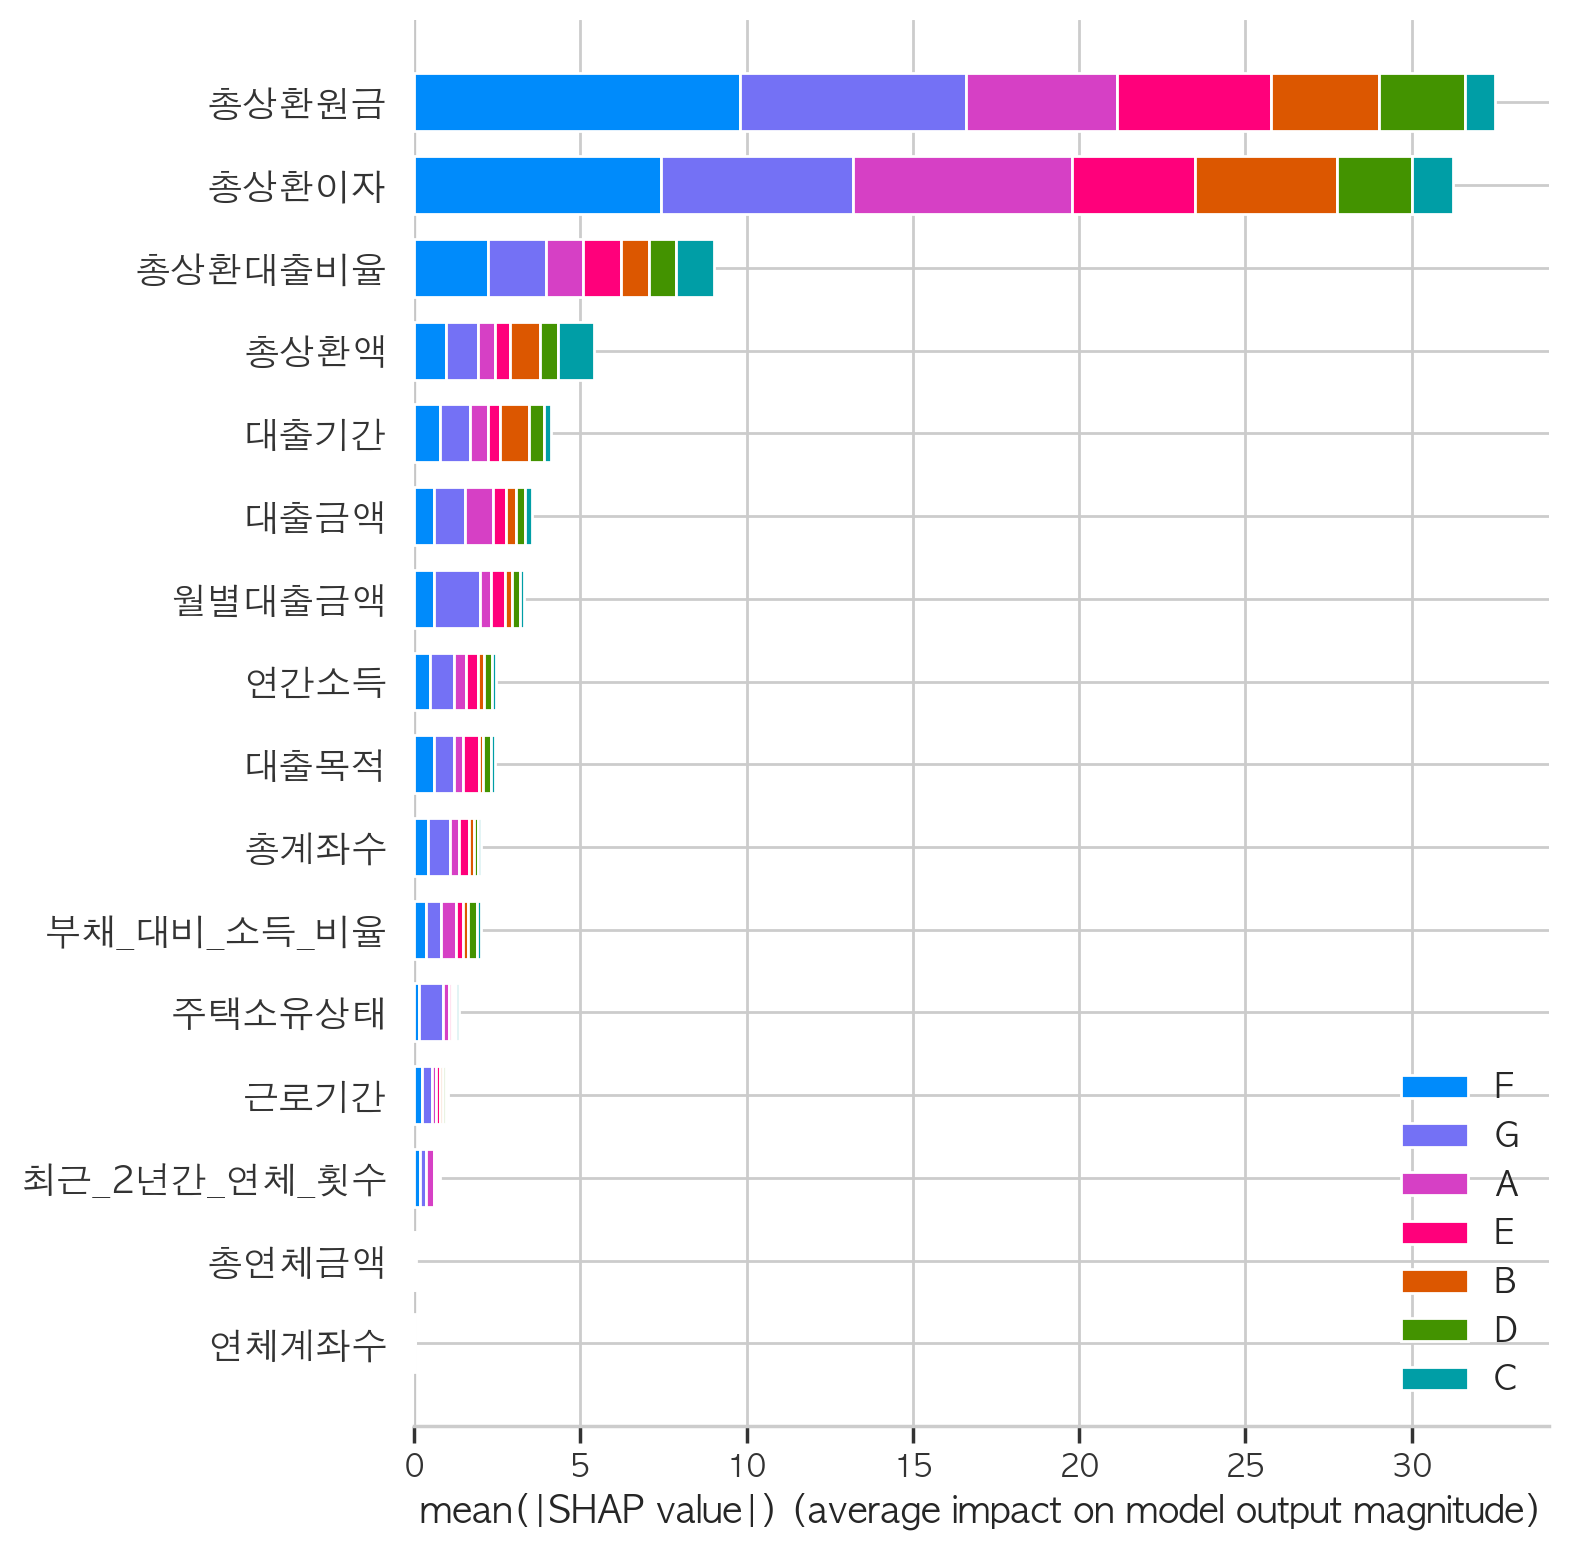

In [286]:
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=class_names)

In [290]:
# 3. LGBMClassifier
# 3-26. n_estimators=1500, learning_rate=0.1, max_depth=17, f1-score average='weighted'

lgb_model = LGBMClassifier(n_estimators=1500, learning_rate=0.1, max_depth=17, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted') 
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.999958  0.999958
test   0.881283  0.880797

In [293]:
# 여기서부터는 XGBooster 모델링

In [292]:
# 4. XGBooster
# 4-1. n_estimators=100, learning_rate=0.1, max_depth=4

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.832703  0.832431
test   0.821384  0.820621

In [294]:
# 4. XGBooster
# 4-2. n_estimators=100, learning_rate=0.1, max_depth=5

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.860106  0.860061
test   0.842236  0.841786

In [295]:
# 4. XGBooster
# 4-3. n_estimators=100, learning_rate=0.1, max_depth=6

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.884532  0.884629
test   0.857273  0.857025

In [296]:
# 4. XGBooster
# 4-4. n_estimators=100, learning_rate=0.1, max_depth=7

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.908113  0.908211
test   0.867575  0.867318

In [297]:
# 4. XGBooster
# 4-5. n_estimators=100, learning_rate=0.1, max_depth=8

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=8, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.931458  0.931531
test   0.879247  0.878945

In [298]:
# 4. XGBooster
# 4-6. n_estimators=100, learning_rate=0.1, max_depth=9

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=9, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.950512  0.950572
test   0.884440  0.884101

In [299]:
# 4. XGBooster
# 4-7. n_estimators=100, learning_rate=0.1, max_depth=10

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.969883  0.969919
test   0.890463  0.890139

In [300]:
# 4. XGBooster
# 4-8. n_estimators=100, learning_rate=0.1, max_depth=11

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=11, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.981459  0.981479
test   0.893703  0.893330

In [301]:
# 4. XGBooster
# 4-9. n_estimators=100, learning_rate=0.1, max_depth=12

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=12, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.989975  0.989981
test   0.897109  0.896748

In [302]:
# 4. XGBooster
# 4-10. n_estimators=100, learning_rate=0.1, max_depth=13

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=13, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.994406  0.994408
test   0.897940  0.897575

In [303]:
# 4. XGBooster
# 4-11. n_estimators=100, learning_rate=0.1, max_depth=14

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=14, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.996940  0.996941
test   0.898937  0.898600

In [304]:
# 4. XGBooster
# 4-12. n_estimators=100, learning_rate=0.1, max_depth=15

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=15, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.998338  0.998339
test   0.900889  0.900549

In [305]:
# 4. XGBooster
# 4-13. n_estimators=100, learning_rate=0.1, max_depth=16

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=16, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.999335  0.999335
test   0.901346  0.901006

In [306]:
# 4. XGBooster
# 4-14. n_estimators=100, learning_rate=0.1, max_depth=17

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=17, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.999806  0.999806
test   0.901595  0.901307

In [307]:
# 4. XGBooster
# 4-15. n_estimators=100, learning_rate=0.1, max_depth=18

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=18, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.999875  0.999875
test   0.902177  0.901867

In [308]:
# 4. XGBooster
# 4-16. n_estimators=100, learning_rate=0.1, max_depth=19

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=19, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.999972  0.999972
test   0.902094  0.901790

In [309]:
# 4. XGBooster 
# 4-17. n_estimators=200, learning_rate=0.1, max_depth=18 =>max_depth=19였을때 성능이 떨어지기 시작해서 18로 고정

xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=18, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy       F1
train  1.000000  1.00000
test   0.903423  0.90314

In [310]:
# 4. XGBooster 
# 4-18. n_estimators=300, learning_rate=0.1, max_depth=18

xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=18, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.904503  0.904232

In [311]:
# 4. XGBooster 
# 4-19. n_estimators=400, learning_rate=0.1, max_depth=18

xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=18, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.904129  0.903857

In [312]:
# 이 정도에서 멈추는 것이 좋겠다. 메모리 문제, 효율성문제로
# 4. XGBooster 
# 4-20. n_estimators=500, learning_rate=0.1, max_depth=18

xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=18, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.904752  0.904476

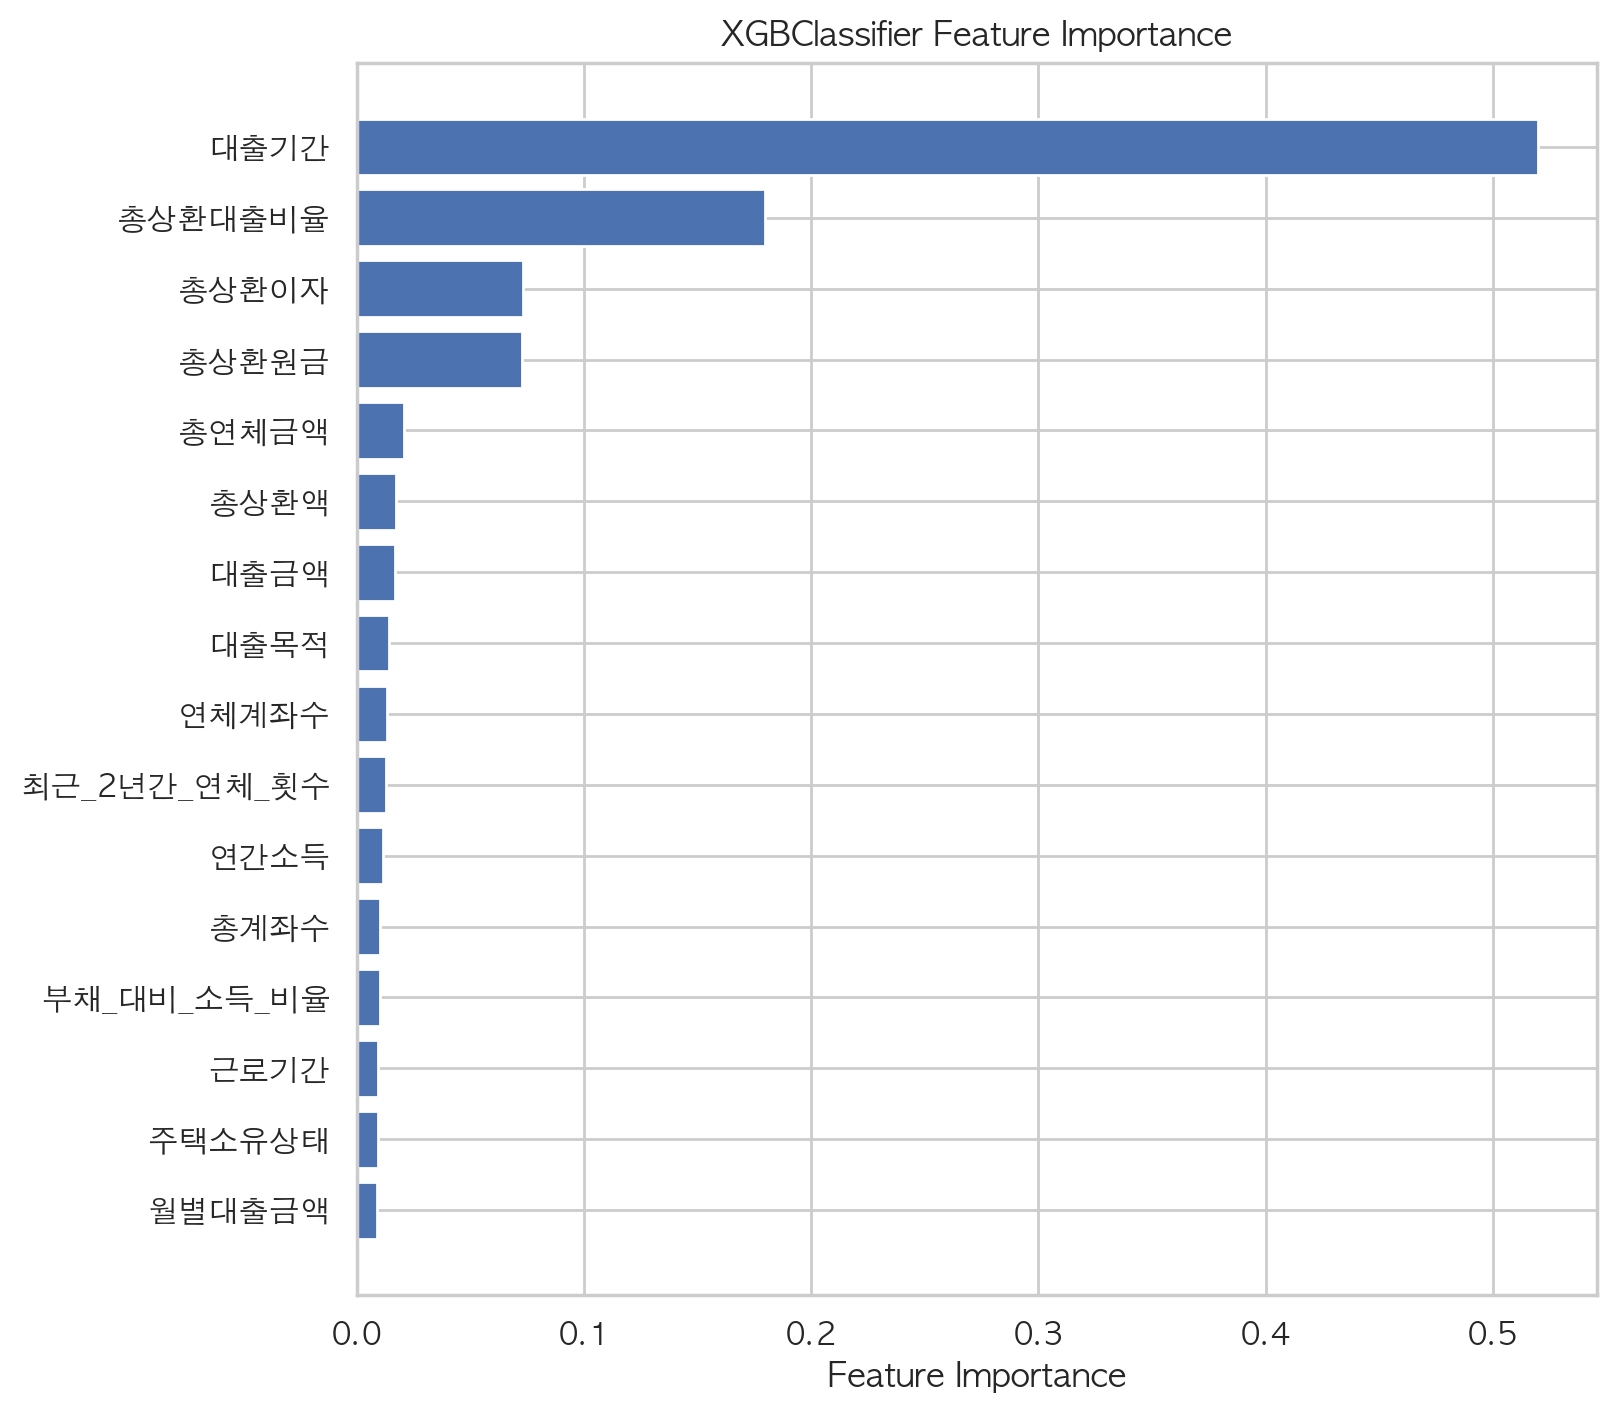

In [313]:
# 피처 중요도 얻기
feature_importances = xgb_model.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기 (예시)
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('XGBClassifier Feature Importance')
plt.show()


In [314]:
# 4. XGBooster 
# 4-21. n_estimators=600, learning_rate=0.1, max_depth=18

xgb_model = XGBClassifier(n_estimators=600, learning_rate=0.1, max_depth=18, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train   1.00000  1.000000
test    0.90496  0.904684

In [ ]:
# XGBooster에서 이거 쓸걸... n_jobs= -1

In [317]:
# 여기서부터 AdaBoostClassifier

In [316]:
# 5. AdaBoostClassifier
# 5-1. n_estimators=50, learning_rate=0.1

ad_model = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state = 42)
ad_model.fit(X_train, y_train)

y_pred_train = ad_model.predict(X_train)
y_pred_test = ad_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.361858  0.264567
test   0.358229  0.261779

In [318]:
# 5. AdaBoostClassifier
# 5-2. n_estimators=100, learning_rate=0.1

ad_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state = 42)
ad_model.fit(X_train, y_train)

y_pred_train = ad_model.predict(X_train)
y_pred_test = ad_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.395104  0.301581
test   0.395821  0.302357

In [321]:
# 5. AdaBoostClassifier
# 5-3. n_estimators=200, learning_rate=0.1

ad_model = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state = 42)
ad_model.fit(X_train, y_train)

y_pred_train = ad_model.predict(X_train)
y_pred_test = ad_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.432795  0.351277
test   0.432624  0.351913

In [ ]:
# 그리드서치로 최적의 하이퍼 파라미터 찾기

In [325]:
%%time

ad_model = AdaBoostClassifier()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
# n_estimators=200, learning_rate=0.1, random_state = 42
param_grid = {
    'n_estimators': [300, 500, 700, 900, 1000],                        
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2],             
    'random_state': [42]                                          
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(ad_model, param_grid, cv=5, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X, y)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_dc = grid_search.best_estimator_
best_params_grid_search_dc = grid_search.best_params_
print("Best Model:", best_model_grid_search_dc)
print("Best Parameters:", best_params_grid_search_dc)

Best Model: AdaBoostClassifier(learning_rate=0.5, n_estimators=500, random_state=42)
Best Parameters: {'learning_rate': 0.5, 'n_estimators': 500, 'random_state': 42}
CPU times: user 55.1 s, sys: 5.88 s, total: 1min
Wall time: 48min 1s


In [326]:
# 5. AdaBoostClassifier
# 5-4. n_estimators=500, learning_rate=0.5

ad_model = AdaBoostClassifier(n_estimators=500, learning_rate=0.5, random_state = 42)
ad_model.fit(X_train, y_train)

y_pred_train = ad_model.predict(X_train)
y_pred_test = ad_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.564408  0.554432
test   0.555869  0.546026

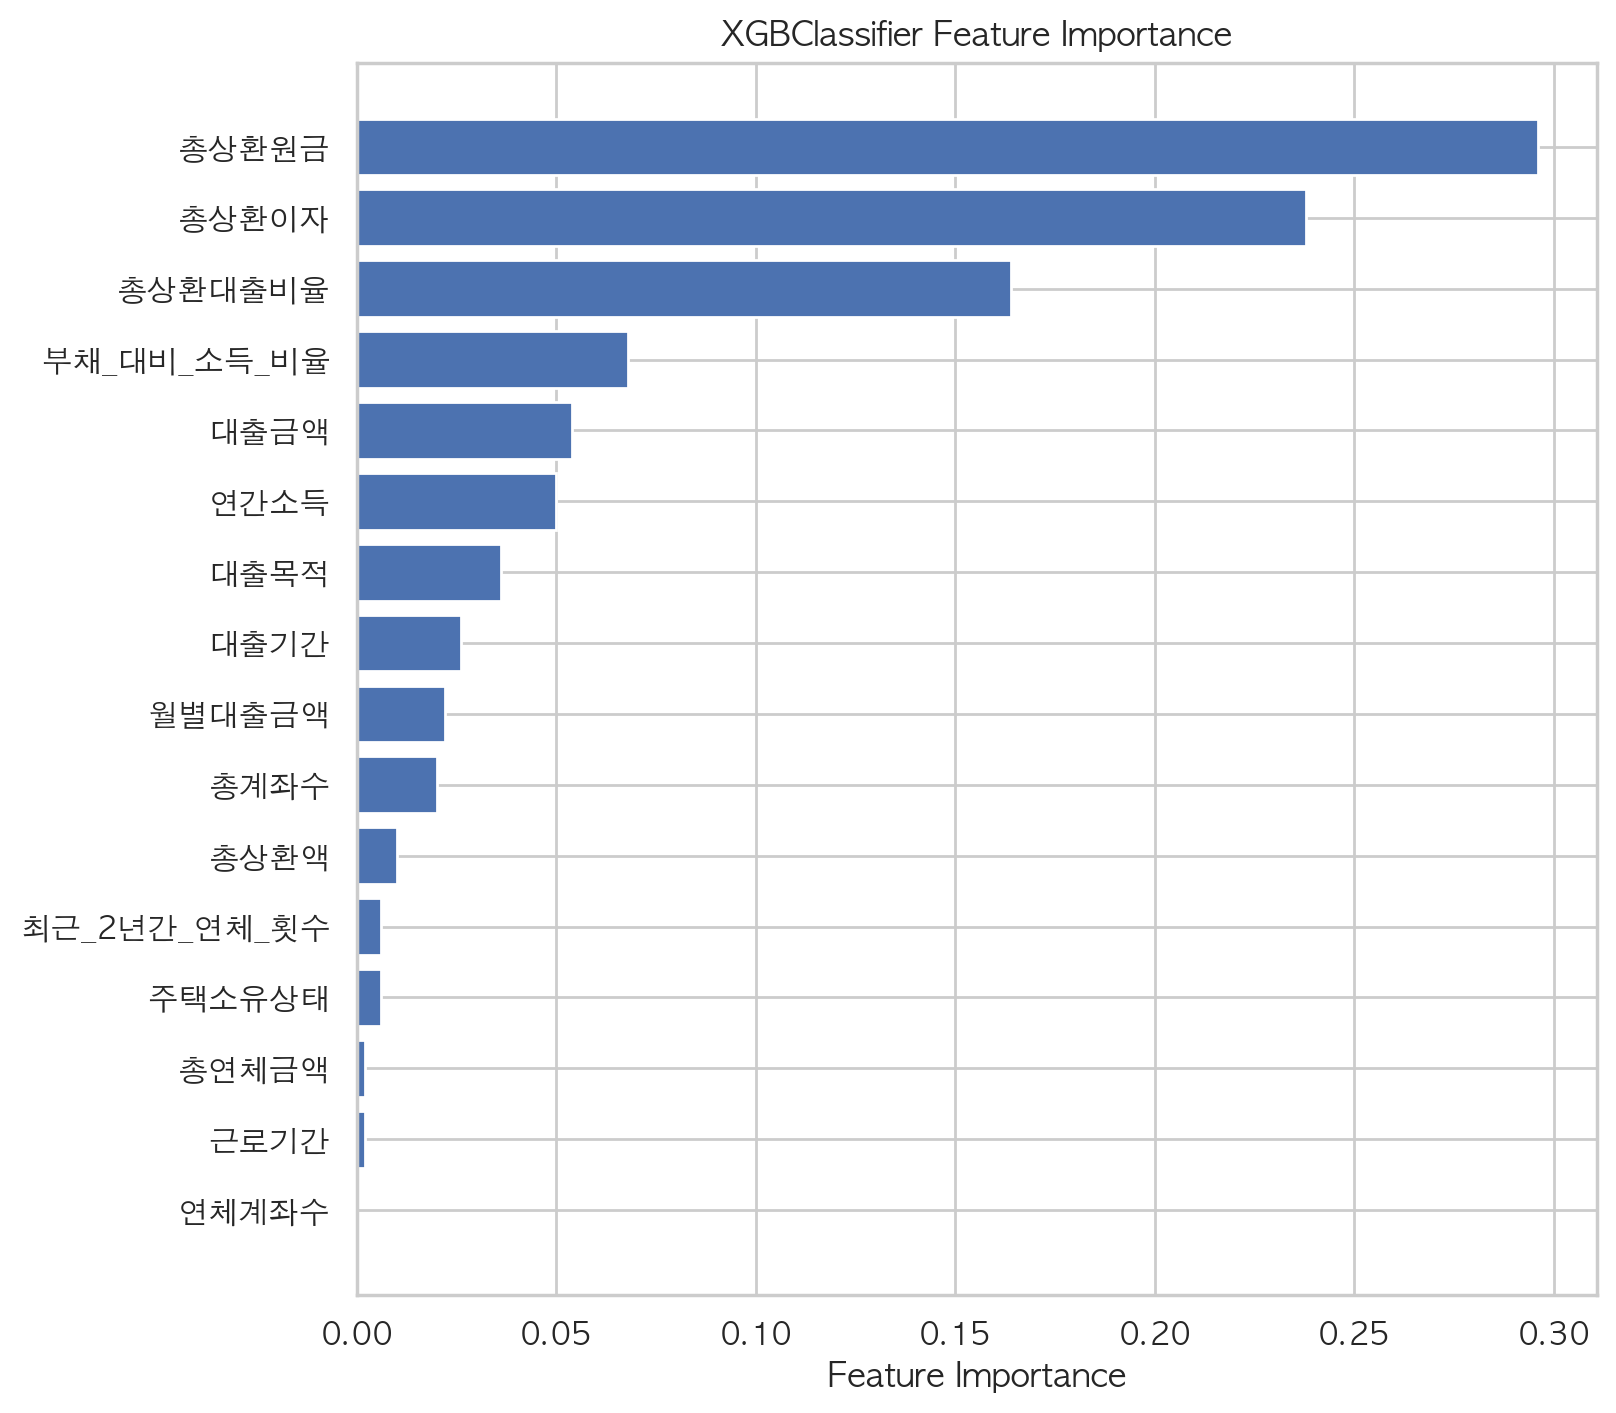

In [327]:
# 피처 중요도 얻기
feature_importances = ad_model.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기 (예시)
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('XGBClassifier Feature Importance')
plt.show()


In [328]:
# 5. AdaBoostClassifier
# 5-5. n_estimators=500, learning_rate=0.5, algorithm='SAMME'

ad_model = AdaBoostClassifier(n_estimators=500, learning_rate=0.5, algorithm='SAMME', random_state = 42)
ad_model.fit(X_train, y_train)

y_pred_train = ad_model.predict(X_train)
y_pred_test = ad_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.448497  0.386431
test   0.446997  0.385190

In [329]:
# 여기서부터 BaggingClassifier

In [334]:
# 6. BaggingClassifier
# 6-1. n_estimators=100, learning_rate=0.1

bg_model = BaggingClassifier(n_estimators=100, random_state = 42, n_jobs=-1)
bg_model.fit(X_train, y_train)

y_pred_train = bg_model.predict(X_train)
y_pred_test = bg_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.999958  0.999958
test   0.883817  0.883527

In [337]:
# 6. BaggingClassifier
# 6-2. n_estimators=200, learning_rate=0.1

bg_model = BaggingClassifier(n_estimators=200, random_state = 42, n_jobs=-1)
bg_model.fit(X_train, y_train)

y_pred_train = bg_model.predict(X_train)
y_pred_test = bg_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.884647  0.884381

In [338]:
# 6. BaggingClassifier
# 6-3. n_estimators=300, learning_rate=0.1

bg_model = BaggingClassifier(n_estimators=300, random_state = 42, n_jobs=-1)
bg_model.fit(X_train, y_train)

y_pred_train = bg_model.predict(X_train)
y_pred_test = bg_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.885104  0.884856

In [342]:
# 6. BaggingClassifier
# 6-4. n_estimators=400, learning_rate=0.1

bg_model = BaggingClassifier(n_estimators=400, random_state = 42, n_jobs=-1)
bg_model.fit(X_train, y_train)

y_pred_train = bg_model.predict(X_train)
y_pred_test = bg_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.885893  0.885644

In [346]:
# 6. BaggingClassifier
# 6-5. n_estimators=400, learning_rate=0.1 + feature importances보기 위해 base_estimator을 그냥 적어줌, defalt값도 DTC()이다.

bg_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=400, random_state = 42, n_jobs=-1)
bg_model.fit(X_train, y_train)

y_pred_train = bg_model.predict(X_train)
y_pred_test = bg_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.885893  0.885644

In [349]:
bg_model.base_estimator_

DecisionTreeClassifier()

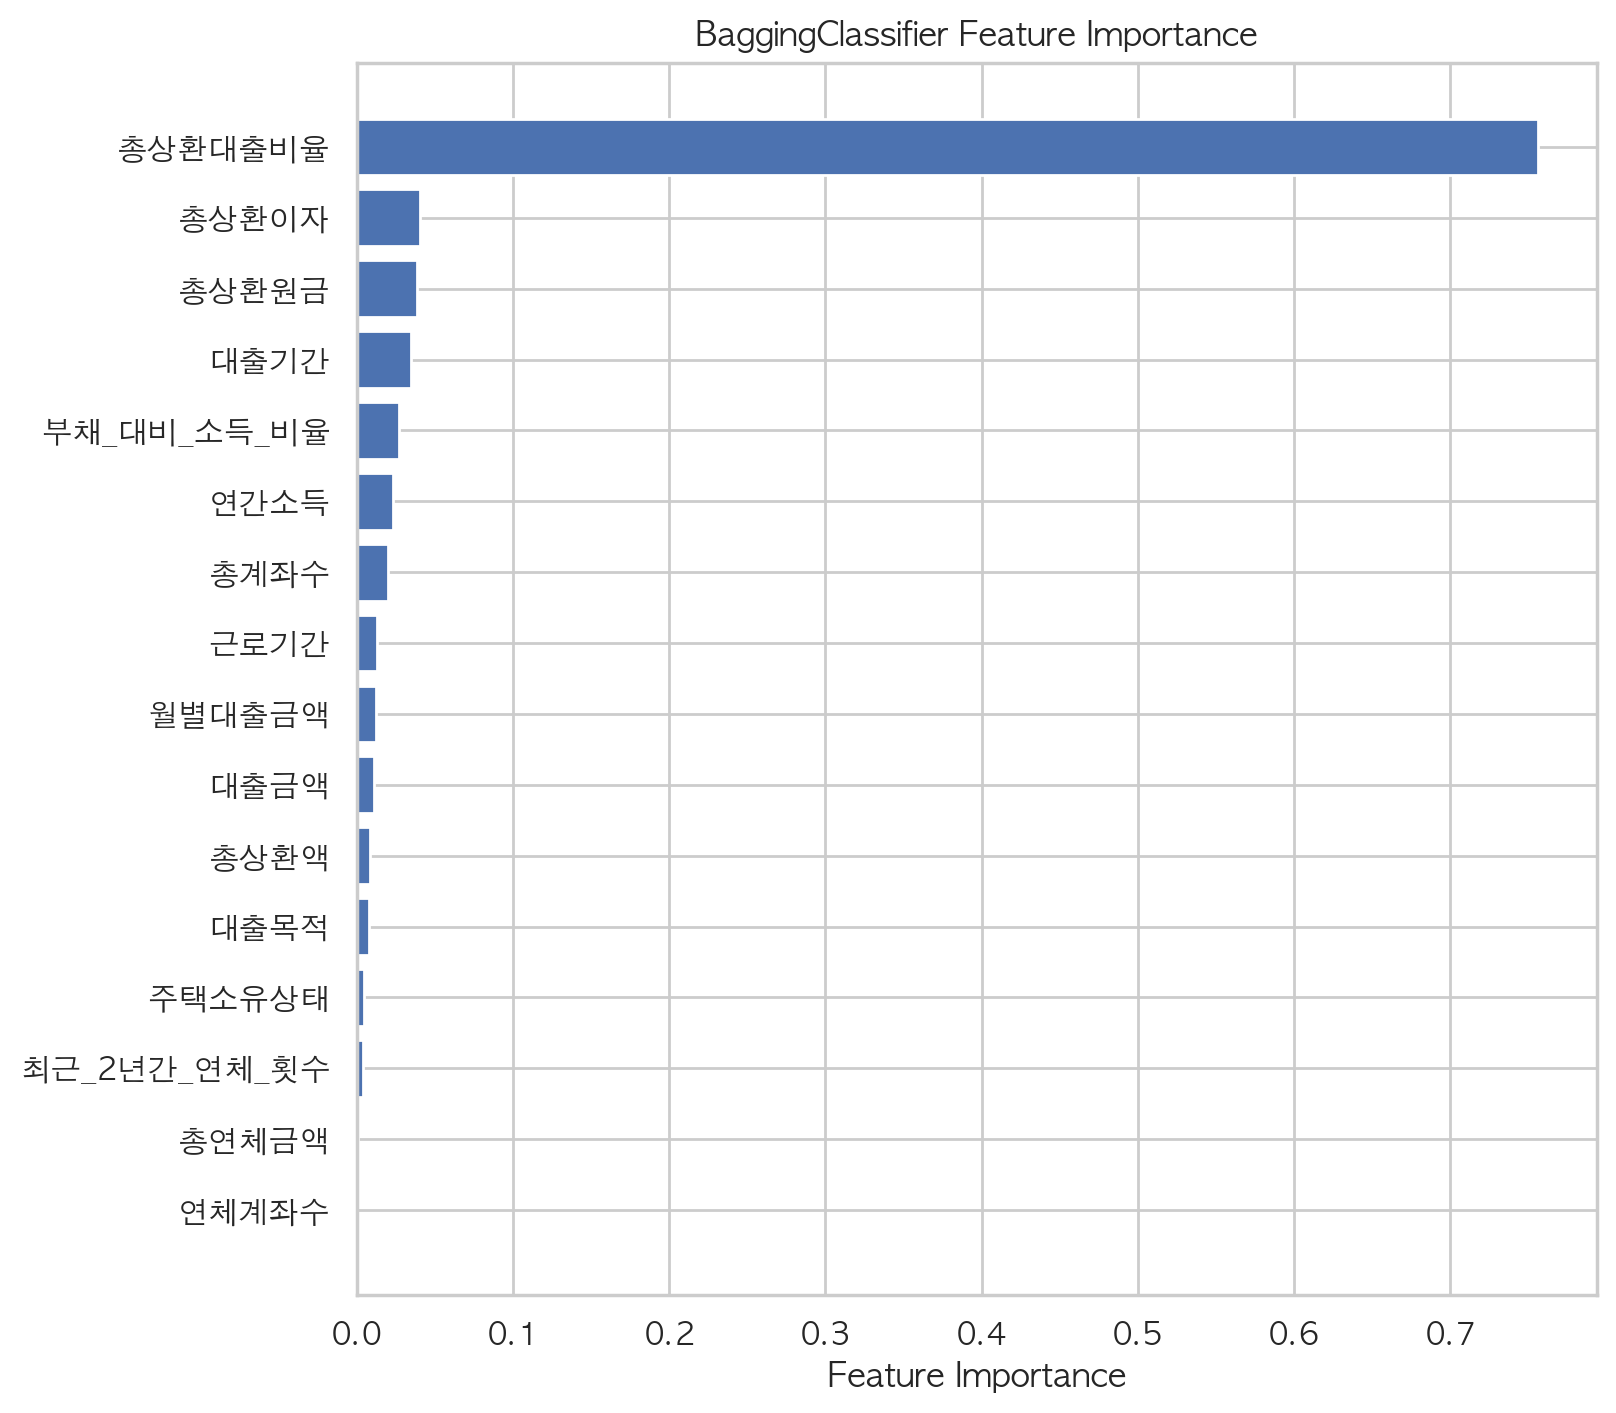

In [350]:
# BaggingClassifier에서 base_estimator인 결정 트리 가져오기
base_tree = bg_model.base_estimator_

# 기본 분류기를 학습시키기
base_tree.fit(X_train, y_train)

# 결정 트리의 특성 중요도 확인
feature_importances = base_tree.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기 (예시)
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('BaggingClassifier Feature Importance')
plt.show()

In [340]:
# 6. BaggingClassifier 
# 6-6. n_estimators=500, learning_rate=0.1 : 400과 비교했을 때 => 오히려 성능 떨어짐

bg_model = BaggingClassifier(n_estimators=500, random_state = 42, n_jobs=-1)
bg_model.fit(X_train, y_train)

y_pred_train = bg_model.predict(X_train)
y_pred_test = bg_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.885769  0.885512

In [351]:
# 여기서부터 RandomForestClassifier

In [352]:
# 7. RandomForestClassifier 
# 7-1. n_estimators=100, criterion='gini', max_depth=5

rf_model = RandomForestClassifier(random_state = 42, n_estimators=100, criterion='gini', max_depth=5, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.528794  0.505691
test   0.525671  0.503039

In [353]:
# 그리드서치 사용

In [355]:
%%time

rf_model = RandomForestClassifier()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid = {
    'n_estimators': [100],                        
    'criterion': ['gini', 'entropy'],             
    'random_state': [42],
    'max_depth': [7, 8, 9, 10, 11, 12]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X, y)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_dc = grid_search.best_estimator_
best_params_grid_search_dc = grid_search.best_params_
print("Best Model:", best_model_grid_search_dc)
print("Best Parameters:", best_params_grid_search_dc)

Best Model: RandomForestClassifier(criterion='entropy', max_depth=12, random_state=42)
Best Parameters: {'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 100, 'random_state': 42}
CPU times: user 19.9 s, sys: 1.01 s, total: 20.9 s
Wall time: 3min 53s


In [356]:
# 7. RandomForestClassifier 
# 7-2. n_estimators=100, criterion='entropy', max_depth=12

rf_model = RandomForestClassifier(random_state = 42, n_estimators=100, criterion='entropy', max_depth=12, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.878965  0.878210
test   0.820096  0.816998

In [357]:
# 7. RandomForestClassifier 
# 7-3. n_estimators=100, criterion='entropy', max_depth=13

rf_model = RandomForestClassifier(random_state = 42, n_estimators=100, criterion='entropy', max_depth=13, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.907393  0.907166
test   0.830979  0.828519

In [358]:
# 7. RandomForestClassifier 
# 7-4. n_estimators=100, criterion='entropy', max_depth=14

rf_model = RandomForestClassifier(random_state = 42, n_estimators=100, criterion='entropy', max_depth=14, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.932026  0.932002
test   0.843400  0.841548

In [359]:
# 7. RandomForestClassifier 
# 7-5. n_estimators=100, criterion='entropy', max_depth=15

rf_model = RandomForestClassifier(random_state = 42, n_estimators=100, criterion='entropy', max_depth=15, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.953198  0.953247
test   0.851416  0.849965

In [360]:
# 7. RandomForestClassifier 
# 7-6. n_estimators=100, criterion='entropy', max_depth=16

rf_model = RandomForestClassifier(random_state = 42, n_estimators=100, criterion='entropy', max_depth=16, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.968942  0.968983
test   0.856941  0.855737

In [361]:
# 7. RandomForestClassifier 
# 7-7. n_estimators=100, criterion='entropy', max_depth=17

rf_model = RandomForestClassifier(random_state = 42, n_estimators=100, criterion='entropy', max_depth=17, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.980684  0.980708
test   0.858229  0.856899

In [362]:
# 7. RandomForestClassifier 
# 7-8. n_estimators=100, criterion='entropy', max_depth=18

rf_model = RandomForestClassifier(random_state = 42, n_estimators=100, criterion='entropy', max_depth=18, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy       F1
train  0.989130  0.98914
test   0.861386  0.86011

In [363]:
# 7. RandomForestClassifier 
# 7-9. n_estimators=100, criterion='entropy', max_depth=19

rf_model = RandomForestClassifier(random_state = 42, n_estimators=100, criterion='entropy', max_depth=19, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.994323  0.994326
test   0.863587  0.862604

In [364]:
# 7. RandomForestClassifier 
# 7-10. n_estimators=100, criterion='entropy', max_depth=20 => 성능 떨어짐 max_depth=19에서 멈추는 것이 좋아보임

rf_model = RandomForestClassifier(random_state = 42, n_estimators=100, criterion='entropy', max_depth=20, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.997452  0.997453
test   0.862175  0.861085

In [365]:
# 7. RandomForestClassifier 
# 7-11. n_estimators=200, criterion='entropy', max_depth=19

rf_model = RandomForestClassifier(random_state = 42, n_estimators=200, criterion='entropy', max_depth=19, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.995389  0.995392
test   0.864958  0.863932

In [366]:
# 7. RandomForestClassifier 
# 7-12. n_estimators=300, criterion='entropy', max_depth=19

rf_model = RandomForestClassifier(random_state = 42, n_estimators=300, criterion='entropy', max_depth=19, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.995264  0.995268
test   0.865249  0.864223

In [367]:
# 7. RandomForestClassifier 
# 7-12. n_estimators=400, criterion='entropy', max_depth=19

rf_model = RandomForestClassifier(random_state = 42, n_estimators=400, criterion='entropy', max_depth=19, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.995223  0.995226
test   0.865955  0.864916

In [368]:
# 7. RandomForestClassifier 
# 7-13. n_estimators=500, criterion='entropy', max_depth=19

rf_model = RandomForestClassifier(random_state = 42, n_estimators=500, criterion='entropy', max_depth=19, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.995444  0.995448
test   0.866703  0.865663

In [369]:
# 7. RandomForestClassifier 
# 7-14. n_estimators=600, criterion='entropy', max_depth=19 => 오히려 성능 떨어짐

rf_model = RandomForestClassifier(random_state = 42, n_estimators=600, criterion='entropy', max_depth=19, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.995666  0.995669
test   0.866080  0.865046

In [ ]:
# 여기서부터 ExtraTreesClassifier

In [371]:
# 8. ExtraTree 
# 8-1. 

et_model = ExtraTreesClassifier(random_state = 42)
et_model.fit(X_train, y_train)

y_pred_train = et_model.predict(X_train)
y_pred_test = et_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  1.000000  1.000000
test   0.793927  0.790726

In [374]:
# 8. ExtraTreesClassifier 
# 8-2. n_estimators=100, criterion='entropy', max_depth=10

et_model = ExtraTreesClassifier(random_state = 42, n_estimators=100, criterion='gini', max_depth=20, n_jobs=-1)
et_model.fit(X_train, y_train)

y_pred_train = et_model.predict(X_train)
y_pred_test = et_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.980988  0.981025
test   0.731453  0.725951